In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

# from collections import Counter
# import re
# from nltk.stem.porter import *

# from time import sleep
# from textblob import TextBlob
# from textblob.exceptions import NotTranslated

#import googletrans
#from googletrans import Translator

#import langid # language identification (i.e. what language is this?)

#from unidecode import unidecode

# import os
# os.environ['PROJ_LIB'] = 'C:/Users/USERNAME/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'
# from mpl_toolkits.basemap import Basemap
# from matplotlib.colors import rgb2hex
# from matplotlib.patches import Polygon
# from matplotlib.collections import PatchCollection

import plotly.express as px


In [3]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Machivallianism Test
## Psychological trait centered on interpersonal manipulation, unemotional coldness, and indifference to morality

*Author: Sashka Ignatova, Software University, Sofia, ignatovasashka@gmail.com*

#### Abstract

This article analyses how a set of personality traits, evaluated with the clssical Big Five Personality Inventory are correlated to Machiavellianism which is a psychological trait centered on interpersonal manipulation, unemotional coldness, and indifference to morality. There are also interesting demographic aspects that are related to this trait.

#### Key words 
Machivallianism, personality, psychology, neural network

#### 1. Introduction
The trait is named after the political philosophy of Niccolò Machiavelli, as psychologists Richard Christie and Florence Geis used edited and truncated statements inspired by his works to study variations in human behaviors.

TIPI(Ten Item Personality Inventory) refers to the Big Five personality model, that is a suggested taxonomy, or grouping, for personality traits, developed from the 1980s onwards in psychological trait theory.

#### 2. Research Questions and Hypothesis
Which personality traits and demographic aspects are strongly related to Machivallianism? Could we predict the MACH-IV score, having a Personality Inventory and demographic data on a concrete observation basis?

#### 2. Data and Privacy
Open sourced raw data from Openpsychometrics.org

Questions, answers, and metadata collected from 73,489 Machivallianism Tests. The data was hosted on OpenPsychometrics.org a nonprofit effort to educate the public about psychology and to collect data for psychological research. The notes on the data collected is in the codebook.txt

Mach IV test, a 20-question, Likert-scale personality survey, became the standard self-assessment tool and scale of the Machiavellianism construct. Those who score high on the scale (High Machs) are more likely to have a high level of deceitfulness and callousness.

This data was collected using an online version of the MACH-IV developed by Richard Christie and Florence L. Geis. See Christie, R. & Geis, F. (1970) "Studies in Machiavellianism". NY: Academic Press.

Data collection took place July 2017 - March 2019.

The main body of the consisted of 20 questions. The text of those questions is below.

* "Q1" : "Never tell anyone the real reason you did something unless it is useful to do so.",
* "Q2" : "The best way to handle people is to tell them what they want to hear.",
* "Q3" : "One should take action only when sure it is morally right.",
* "Q4" : "Most people are basically good and kind.",
* "Q5" : "It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.",
* "Q6" : "Honesty is the best policy in all cases.",
* "Q7" : "There is no excuse for lying to someone else.",
* "Q8" : "Generally speaking, people won't work hard unless they're forced to do so.",
* "Q9" : "All in all, it is better to be humble and honest than to be important and dishonest.",
* "Q10" : "When you ask someone to do something for you, it is best to give the real reasons for wanting it rather than giving reasons which carry more weight.",
* "Q11" : "Most people who get ahead in the world lead clean, moral lives.",
* "Q12" : "Anyone who completely trusts anyone else is asking for trouble.",
* "Q13" : "The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.",
* "Q14" : "Most people are brave.",
* "Q15" : "It is wise to flatter important people.",
* "Q16" : "It is possible to be good in all respects.",
* "Q17" : "P.T. Barnum was wrong when he said that there's a sucker born every minute.",
* "Q18" : "It is hard to get ahead without cutting corners here and there.",
* "Q19" : "People suffering from incurable diseases should have the choice of being put painlessly to death.",
* "Q20" : "Most people forget more easily the death of their parents than the loss of their property."

The questions were presented one at a time in a random order. Users responded to each item on a five point scale: 
* 1=Disagree
* 2=Slightly disagree
* 3=Neutral
* 4=Slightly agree
* 5=Agree.

Three values are recorded for each question. e.g.

* Q1A - the user's answer
* Q1I - the position of that item in the survey
* Q1E - the time spend on that question in milliseconds

After the test body, users were asked if they would be willing to complete an additional research survey. This data only includes those who agreed to.

The optional survey included a variety of questions:

The Ten Item Personality Inventory was administered (see Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.):

* TIPI1	Extraverted, enthusiastic.
* TIPI2	Critical, quarrelsome.
* TIPI3	Dependable, self-disciplined.
* TIPI4	Anxious, easily upset.
* TIPI5	Open to new experiences, complex.
* TIPI6	Reserved, quiet.
* TIPI7	Sympathetic, warm.
* TIPI8	Disorganized, careless.
* TIPI9	Calm, emotionally stable.
* TIPI10	Conventional, uncreative.

The TIPI items were rated "I see myself as:" _____ such that

* 1 = Disagree strongly
* 2 = Disagree moderately
* 3 = Disagree a little
* 4 = Neither agree nor disagree
* 5 = Agree a little
* 6 = Agree moderately
* 7 = Agree strongly


The following items were presented as a check-list and subjects were instructed "In the grid below, check all the words whose definitions you are sure you know":

* VCL1	boat
* VCL2	incoherent
* VCL3	pallid
* VCL4	robot
* VCL5	audible
* VCL6	cuivocal
* VCL7	paucity
* VCL8	epistemology
* VCL9	florted
* VCL10	decide
* VCL11	pastiche
* VCL12	verdid
* VCL13	abysmal
* VCL14	lucid
* VCL15	betray
* VCL16	funny

A value of 1 is checked, 0 means unchecked. The words at VCL6, VCL9, and VCL12 are not real words and can be used as a validity check.


A bunch more questions were then asked:


* education			"How much education have you completed?", 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree
* urban				"What type of area did you live when you were a child?", 1=Rural (country side), 2=Suburban, 3=Urban (town, city)
* gender				"What is your gender?", 1=Male, 2=Female, 3=Other
* engnat				"Is English your native language?", 1=Yes, 2=No
* age					"How many years old are you?"
* hand				"What hand do you use to write with?", 1=Right, 2=Left, 3=Both
* religion			"What is your religion?", 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other
* orientation			"What is your sexual orientation?", 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other
* race				"What is your race?", 10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other
* voted				"Have you voted in a national election in the past year?", 1=Yes, 2=No
* married				"What is your marital status?", 1=Never married, 2=Currently married, 3=Previously married
* familysize			"Including you, how many children did your mother have?"		
* major				"If you attended a university, what was your major (e.g. "psychology", "English", "civil engineering")?"


The following value were calculated by the server:

* country		the user's network location

* screenw		width of user's device in pixels
* screenh		width of user's device in pixels

The time spend on each page was recorded in seconds:

* introelapse
* testelapse
* surveyelapse

#### 3. Related Research


### 4. Data Cleaning

Data is read from the `data.csv` file.

In [4]:
data = pd.read_csv("data.csv", sep = "	")
data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,5.0,12038.0,3.0,10.0,21089.0,1.0,8.0,7730.0,2.0,16.0,10618.0,4.0,12.0,10175.0,3.0,9.0,22181.0,3.0,18.0,35969.0,1.0,2.0,11265.0,5.0,14.0,10618.0,4.0,17.0,15993.0,1.0,...,5,6,1,7,3,7,4,7,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,2,3,1,1,26,1440.0,900.0,1,7,1,30,1,2,5,Marketing
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,15.0,5798.0,5.0,1.0,7301.0,1.0,8.0,3185.0,1.0,5.0,10833.0,4.0,2.0,5130.0,2.0,13.0,15996.0,1.0,6.0,8834.0,1.0,20.0,4113.0,5.0,14.0,3336.0,5.0,4.0,5882.0,2.0,...,5,6,2,4,6,5,4,6,5,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2,2,1,1,18,1536.0,864.0,1,1,1,60,2,1,2,mathematics
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,4.0,2733.0,5.0,9.0,5549.0,1.0,15.0,2097.0,1.0,1.0,4322.0,5.0,17.0,4563.0,1.0,11.0,3513.0,1.0,20.0,11082.0,1.0,6.0,7217.0,5.0,18.0,3286.0,5.0,19.0,4783.0,1.0,...,7,6,7,5,7,1,4,1,4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,2,1,15,375.0,667.0,1,2,2,10,2,1,2,Chemistry
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,4.0,4346.0,5.0,13.0,16775.0,1.0,20.0,4901.0,3.0,10.0,6365.0,2.0,5.0,6098.0,4.0,14.0,11333.0,2.0,6.0,17063.0,1.0,18.0,6680.0,5.0,15.0,6799.0,1.0,2.0,14912.0,1.0,...,5,5,7,7,2,6,2,2,3,1,1,1,1,1,0,0,1,0,1,0,1,0,1,1,1,4,3,2,2,31,1280.0,720.0,1,6,1,60,1,3,2,international relations
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,4.0,4312.0,2.0,5.0,32253.0,1.0,10.0,7852.0,2.0,18.0,19931.0,4.0,17.0,9923.0,2.0,12.0,9615.0,2.0,3.0,14182.0,1.0,15.0,9492.0,4.0,20.0,15650.0,4.0,14.0,24308.0,1.0,...,5,5,6,7,6,5,3,4,5,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,2,1,2,20,360.0,640.0,1,4,3,60,1,1,2,Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73484,2.0,17.0,9925.0,1.0,6.0,14218.0,2.0,16.0,25499.0,4.0,2.0,13327.0,3.0,3.0,46247.0,3.0,8.0,20023.0,2.0,4.0,31185.0,4.0,13.0,19819.0,5.0,5.0,23995.0,4.0,14.0,29862.0,1.0,1.0,28844.0,5.0,10.0,6738.0,1.0,9.0,20418.0,2.0,...,4,5,2,6,6,6,3,3,6,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,4,3,1,2,29,2048.0,1080.0,1,12,1,10,2,2,1,business
73485,5.0,9.0,5816.0,5.0,4.0,4368.0,1.0,15.0,7246.0,1.0,17.0,5051.0,5.0,10.0,9879.0,1.0,2.0,4856.0,1.0,16.0,4733.0,3.0,13.0,13007.0,1.0,6.0,6618.0,1.0,20.0,14724.0,1.0,14.0,4902.0,5.0,5.0,4486.0,4.0,3.0,14541.0,1.0,...,7,5,5,5,6,3,3,2,2,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,2,2,2,2,20,1440.0,900.0,1,2,3,60,2,1,2,sociology
73486,2.0,17.0,5353.0,1.0,18.0,6846.0,1.0,9.0,4920.0,1.0,1.0,4386.0,4.0,16.0,5760.0,2.0,8.0,3959.0,2.0,3.0,3750.0,2.0,10.0,4091.0,3.0,13.0,5320.0,3.0,4.0,7070.0,2.0,15.0,6060.0,3.0,7.0,3821.0,3.0,11.0,8541.0,1.0,...,6,1,5,5,6,3,5,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,2,3,1,2,31,1280.0,1024.0,1,1,1,60,2,1,3,NaN
73487,4.0,15.0,7974.0,3.0,9.0,7901.0,5.0,17.0,8647.0,3.0,1.0,13332.0,5.0,6.0,14483.0,4.0,3.0,4899.0,3.0,13.0,12788.0,2.0,12.0,12066.0,5.0,5.0,9349.0,4.0,8.0,45649.0,3.0,19.0,19938.0,4.0,10.0,7567.0,1.0,7.0,12429.0,3.0,...,4,5,7,7,5,6,4,6,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,2,3,1,2,24,414.0,736.0,1,3,1,10,1,1,4,Business


All column types should be correct and the desired format, so that the data could be processed. As we could see below some columns are type `float64`, but other columns are types `int64` and `object`. All data types should be `float64` for the needs of deep learning and due to the specific work with `TensorFlow`.

In [5]:
data.dtypes

Q1A           float64
Q1I           float64
Q1E           float64
Q2A           float64
Q2I           float64
               ...   
race            int64
voted           int64
married         int64
familysize      int64
major          object
Length: 105, dtype: object

The data requires tidying and cleaning, so that all values are meaningfull. Each value already represents one observation of one feature. 
Seaching for missing data shows several problems: 

First is that there are many `NaN` values in `major` column.

There are three approaches in dealing with missing data:

* Remove observations with the unknown feature
* Replace unknown values with a certain value
* Replace unknown values with the column mean

I preffer to replace the `NaN` values with the value `"unknown"`. Just before working with `TensorFlow` we would need to assign all categorical value a single code in `float64` format and thus we need to transform all letters to lowercase.

In [6]:
data[data.isna().any(axis=1)]

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,...,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
6,3.0,11.0,3933.0,3.0,10.0,3760.0,2.0,17.0,4684.0,4.0,12.0,1931.0,3.0,19.0,6920.0,3.0,16.0,3313.0,2.0,5.0,3551.0,4.0,20.0,2155.0,4.0,13.0,5126.0,3.0,4.0,5196.0,3.0,9.0,4939.0,2.0,6.0,3561.0,4.0,7.0,3257.0,2.0,...,7,7,2,6,4,7,5,5,1,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2,3,1,2,19,360.0,640.0,1,2,1,60,1,1,2,NaN
9,5.0,7.0,4832.0,4.0,19.0,10465.0,3.0,9.0,4983.0,5.0,3.0,7483.0,4.0,12.0,5602.0,4.0,8.0,3488.0,3.0,4.0,5866.0,2.0,11.0,9302.0,5.0,6.0,6471.0,2.0,2.0,8617.0,1.0,10.0,4650.0,2.0,20.0,3882.0,2.0,15.0,12383.0,1.0,...,5,7,5,5,5,6,1,4,1,1,1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,2,2,1,1,17,375.0,667.0,1,1,1,60,2,1,2,NaN
11,4.0,2.0,35754.0,2.0,14.0,6692.0,3.0,6.0,7414.0,4.0,9.0,3636.0,4.0,17.0,12792.0,4.0,18.0,3716.0,2.0,10.0,10946.0,1.0,4.0,12032.0,4.0,13.0,8240.0,4.0,8.0,14578.0,1.0,3.0,13516.0,4.0,5.0,8907.0,4.0,7.0,8560.0,2.0,...,7,6,2,6,7,5,2,7,6,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,2,3,1,1,40,1920.0,1080.0,1,12,1,30,2,1,2,NaN
12,5.0,15.0,5836.0,5.0,1.0,1882.0,5.0,3.0,5887.0,3.0,10.0,6032.0,5.0,18.0,11008.0,1.0,12.0,5776.0,1.0,8.0,5308.0,5.0,11.0,5881.0,3.0,17.0,14608.0,5.0,2.0,23786.0,1.0,20.0,7429.0,5.0,6.0,8994.0,5.0,16.0,4909.0,1.0,...,4,7,5,7,4,7,1,5,7,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1,3,1,2,79,360.0,640.0,2,1,1,60,2,2,2,NaN
16,4.0,14.0,10480.0,1.0,5.0,6352.0,4.0,8.0,7552.0,1.0,3.0,5581.0,4.0,2.0,12877.0,5.0,7.0,6159.0,5.0,13.0,7232.0,3.0,17.0,8241.0,5.0,1.0,15289.0,3.0,19.0,10236.0,1.0,9.0,4863.0,4.0,20.0,6111.0,2.0,6.0,10841.0,1.0,...,6,6,1,7,1,6,4,6,2,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,2,3,1,2,37,1536.0,864.0,1,1,1,70,2,2,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73476,1.0,5.0,2021.0,1.0,11.0,4428.0,4.0,2.0,10850.0,1.0,12.0,4745.0,1.0,10.0,9773.0,5.0,7.0,1105.0,5.0,18.0,3782.0,3.0,8.0,9562.0,5.0,14.0,1002.0,5.0,19.0,8133.0,2.0,15.0,6105.0,4.0,1.0,9520.0,1.0,9.0,14815.0,2.0,...,6,5,3,6,2,6,5,3,3,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,2,3,2,1,17,360.0,640.0,2,2,2,60,2,1,4,NaN
73479,2.0,15.0,4191.0,5.0,13.0,6015.0,4.0,4.0,6577.0,4.0,20.0,3155.0,1.0,3.0,6057.0,2.0,12.0,3324.0,1.0,7.0,5025.0,1.0,14.0,5347.0,5.0,19.0,6311.0,5.0,11.0,6971.0,1.0,8.0,5905.0,5.0,6.0,9182.0,1.0,2.0,10334.0,2.0,...,6,3,6,7,4,5,6,2,1,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2,2,1,2,21,360.0,740.0,2,2,1,60,2,1,4,NaN
73483,2.0,2.0,29275.0,4.0,18.0,11222.0,2.0,20.0,17794.0,2.0,7.0,5256.0,5.0,12.0,8761.0,5.0,14.0,4740.0,1.0,3.0,7997.0,5.0,13.0,7402.0,5.0,16.0,11466.0,2.0,8.0,14573.0,1.0,19.0,18262.0,5.0,10.0,28904.0,2.0,15.0,10531.0,5.0,...,3,2,5,6,6,6,5,4,4,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,3,0,2,2,23,360.0,740.0,1,2,1,10,1,1,1,NaN
73486,2.0,17.0,5353.0,1.0,18.0,6846.0,1.0,9.0,4920.0,1.0,1.0,4386.0,4.0,16.0,5760.0,2.0,8.0,3959.0,2.0,3.0,3750.0,2.0,10.0,4091.0,3.0,13.0,5320.0,3.0,4.0,7070.0,2.0,15.0,6060.0,3.0,7.0,3821.0,3.0,11.0,8541.0,1.0,...,6,1,5,5,6,3,5,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,2,3,1,2,31,1280.0,1024.0,1,1,1,60,2,1,3,NaN


In [7]:
data.major.isna().sum()

26338

In [8]:
data.major = data.major.fillna("unknown")
data.major = data.major.str.lower()

We need to explore the other `NaN` cases and to see it clear let's unhide all columns:

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
data[data.isna().any(axis=1)]

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
1118,5.0,16.0,6600.0,5.0,14.0,9685.0,1.0,13.0,8204.0,2.0,12.0,2211.0,5.0,1.0,27517.0,1.0,4.0,5942.0,2.0,10.0,7163.0,5.0,9.0,4714.0,2.0,7.0,9580.0,1.0,18.0,11349.0,1.0,20.0,11188.0,5.0,2.0,12150.0,5.0,5.0,10875.0,3.0,6.0,5682.0,5.0,17.0,5204.0,1.0,15.0,9003.0,5.0,3.0,9265.0,5.0,8.0,6349.0,5.0,19.0,6519.0,5.0,11.0,13261.0,NaN,22.0,190.0,204,6,6,3,1,7,1,4,3,7,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,2,3,1,2,22,1366.0,768.0,1,7,1,30,2,1,5,economics
22803,5.0,2.0,11687.0,5.0,11.0,4712.0,3.0,4.0,14722.0,1.0,8.0,4120.0,5.0,14.0,10184.0,1.0,9.0,3463.0,2.0,15.0,5392.0,5.0,12.0,5831.0,2.0,7.0,12798.0,1.0,5.0,10992.0,1.0,19.0,3966.0,5.0,6.0,5360.0,5.0,20.0,5336.0,1.0,18.0,5529.0,5.0,1.0,12768.0,1.0,3.0,5144.0,1.0,10.0,7136.0,5.0,13.0,6985.0,5.0,17.0,8944.0,4.0,16.0,16751.0,NaN,22.0,163.0,160,7,7,4,6,6,4,5,2,7,1,1,1,1,1,1,1,0,0,0,1,0,0,1,1,1,1,3,3,1,1,32,1920.0,1080.0,1,6,1,30,2,2,4,art
23492,5.0,7.0,23584.0,4.0,16.0,17414.0,3.0,6.0,10077.0,4.0,8.0,7915.0,5.0,13.0,16246.0,3.0,18.0,8804.0,3.0,9.0,9151.0,2.0,1.0,13620.0,2.0,3.0,13953.0,1.0,19.0,12839.0,1.0,2.0,9817.0,5.0,12.0,46220.0,4.0,11.0,20393.0,2.0,4.0,12830.0,4.0,17.0,27089.0,5.0,5.0,9020.0,2.0,20.0,41224.0,3.0,14.0,12024.0,4.0,15.0,23807.0,5.0,10.0,15957.0,NaN,57.0,353.0,302,2,6,7,6,6,6,7,1,6,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,3,2,2,2,35,360.0,640.0,2,7,1,30,2,2,4,science
26286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EG,25.0,NaN,288,2,1,5,3,7,6,5,5,6,2,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2,3,1,2,17,360.0,640.0,1,2,1,20,2,1,2,unknown
26288,3.0,7.0,8963.0,4.0,8.0,7095.0,3.0,10.0,8992.0,4.0,11.0,12290.0,2.0,1.0,91359.0,2.0,4.0,10337.0,2.0,3.0,7905.0,4.0,19.0,6738.0,3.0,14.0,17411.0,3.0,17.0,5489.0,1.0,5.0,13761.0,2.0,20.0,14218.0,2.0,13.0,19613.0,2.0,16.0,5105.0,4.0,9.0,9275.0,4.0,12.0,12381.0,2.0,18.0,30863.0,4.0,6.0,9642.0,5.0,2.0,16594.0,4.0,15.0,11812.0,US,NaN,342.0,223,6,4,5,5,7,3,7,3,4,3,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2,2,1,1,19,NaN,NaN,1,5,1,60,2,1,2,business
28002,3.0,20.0,9836.0,2.0,7.0,6639.0,3.0,15.0,9981.0,1.0,18.0,4109.0,3.0,12.0,16183.0,2.0,9.0,4759.0,3.0,19.0,33372.0,3.0,2.0,19435.0,4.0,4.0,7759.0,2.0,16.0,10408.0,1.0,17.0,8018.0,4.0,14.0,51151.0,5.0,10.0,18171.0,2.0,1.0,10848.0,3.0,8.0,5398.0,3.0,3.0,33720.0,3.0,11.0,11623.0,4.0,5.0,10956.0,5.0,13.0,25373.0,4.0,6.0,17252.0,US,NaN,315.0,202,5,4,4,6,4,6,5,4,3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,2,3,2,1,14,NaN,NaN,1,2,5,60,2,1,3,arts
29498,1.0,15.0,4483.0,1.0,8.0,4015.0,5.0,10.0,7974.0,2.0,3.0,7145.0,5.0,7.0,7618.0,5.0,5.0,4853.0,5.0,12.0,6184.0,1.0,14.0,4794.0,5.0,1.0,7159.0,5.0,16.0,7035.0,5.0,20.0,6997.0,1.0,17.0,7730.0,1.0,9.0,7584.0,5.0,13.0,3971.0,1.0,6.0,5061.0,5.0,18.0,3338.0,3.0,4.0,10359.0,4.0,2.0,10056.0,1.0,11.0,5491.0,1.0,19.0,6078.0,NaN,12.0,130.0,157,7,5,7,5,5,2,7,1,7,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,3,2,2,2,34,360.0,640.0,2,7,1,30,2,1,5,pharmacy
29513,4.0,4.0,9079.0,2.0,7.0,8529.0,3.0,13.0,8202.0,2.0,16.0,4323.0,5.0,18.0,6671.0,2.0,15.0,4420.0,1.0,6.0,5733.0,4.0,2.0,11161.0,5.0,19.0,6928.0,2.0,14.0,11834.0,1.0,8.0,8065.0,5.0,5.0,7235.0,1.0,3.0,8953.0,2.0,10.0,3015.0,4.0,17.0,4772.0,2.0,1.0,9945.0,4.0,11.0,6632.0,3.0,9.0,14559.0,5.0,20.0,6985.0,1.0,12.0,12067.0,NaN,68.0,160.0,203,3,2,6,5,3,7,7,3,4,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,3,3,2,2,30,320.0,568.0,1,7

Second problem is that three people haven't filled the Machiavellian MACH-IV Test. These observations are not usable, so we would drop them from the dataset.

Another missing data is in `country` column, where `NaN` would be substituted with `UNKNOWN`.

In case of `NaN` values in `introelapse` column they would be substituted with the mean value for the feature.

`NaN` values in `screenw` and `screenh` columns would be substituted with the most common value for the feature.

In [11]:
data = data.dropna(subset=['Q1A'])
pd.set_option('mode.chained_assignment', None)  #To turn off SettingWithCopyWarning arising after the following fillna
data.country = data.country.fillna("UNKNOWN")
data.introelapse = data.introelapse.fillna(data.introelapse.mean())
data.screenw = data.screenw.fillna(data.screenw.mode().loc[0])
data.screenh = data.screenh.fillna(data.screenh.mode().loc[0])

We came across some outliers in column `age`, so we are going to drop the observations containig age > 90.

In [12]:
data = data.drop(data[data.age > 90].index)

As the entries in `major` column could be all kind of text, I suppose the column needs cleaning so that the majors could be summarised into categories, eliminating some unwanted symbols. Let's explore this below:

In [13]:
pd.set_option('display.max_rows', None)
data.groupby('major')['major'].count().nlargest(len(data))

major
unknown                                          26335
psychology                                        2857
business                                          1727
engineering                                       1628
english                                           1376
computer science                                  1352
law                                               1206
economics                                         1032
history                                            906
biology                                            904
psychology                                         740
political science                                  691
medicine                                           672
nursing                                            651
accounting                                         581
finance                                            532
physics                                            532
education                                          522
civi

First of all I notice that I have multiple language entries, also some of them are in Unicode. To translate the non-english words we could try `TextBlob`, that actually makes it to the `Google Translate API` under the hood. TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. TextBlob stands on the giant shoulders of NLTK_ and pattern_, and plays nicely with both.

In [14]:
# def translate_comment(x):
#     try:
#         # Try to translate the string version of the comment
#         return TextBlob(str(x)).translate(to='en')
#     except NotTranslated:
#         # If the output is the same as the input just return the TextBlob version of the input
#         return TextBlob(str(x))

# for i in range(len(data.major)):
#     # Translate one comment at a time
#     data.major.iloc[i] = translate_comment(data.major.iloc[i])

#     # Sleep for a quarter of second. In case you get the HTTP error Too Many Requests it's probably because you are being kicked out by the Google Translate API and you should increase seconds.
#     sleep(0.4)

TextBlob requires smaller amount of data. Otherwise you are boing kicked out by the Google Translate API.

As written in [this article](https://www.kaggle.com/rtatman/analyzing-multilingual-data), any large sample of user-generated text is almost guaranteed to have multiple languages in it. So what can you do about it? There are a couple options:

1. Ignore it
2. Only look at the parts of the data that are in English
3. Break the data apart by language & use language-specific tools when available

Let's take a quick look at the summerized benefits and drawbacks of each approach:

Option 1: Ignore Multilingualism

As we saw, this option will result in violating some of the assumptions built into NLP tools. If you do this, you could end up with a lot of noise and headaches as you try to move through your analysis pipeline.

Option 2: Only look at English

In this dataset, only looking at English would lead to us cutting away about 20% of our data. 

Option 3: Seperate your data by language & analyze them independently

This does take a little more work than the other options...and it would be impractical to do this for every single language in our dataset. We could identify the most frequent languages and do something about them.

In [15]:
# # get the language id for each text
# ids_langid = data.major.apply(langid.classify)

# # get just the language label
# langs = ids_langid.apply(lambda tuple: tuple[0])

# # how many unique language labels were applied?
# print("Number of tagged languages (estimated):")
# print(len(langs.unique()))

# # percent of the total dataset in English
# print("Percent of data in English (estimated):")
# print((sum(langs=="en")/len(langs))*100)

In [16]:
# langs.groupby(langs).size().nlargest(5)

In [17]:
# data["language"] = langs

In [18]:
# pd.reset_option("display.max_rows")

In [19]:
# data.loc[data["language"] == "es"].major.unique()

Unfortunately the choosen language identifier `langid` shows enormous content of english words recognised as foreign for each of the identified languages, so I prefer to assume that there are not so much foreign words in the `major` column and will take `Option 1` and will ignore the fact there are foreign words and would receive some noise anyway, hoping it would not affect much.

In [20]:
#data = data[data.age <= 25]  -- The validity evidence originally reported by Christie would be excellent if the instrument was intended to measure 18-25 year-old student respondents.
# --but it doesn't look to give different results, so we are going to work with the full data

Let's replace all non-letters and digits with " ". This would work better for lemmatizing. This action would remove the unicode letters in the dataset, but as they are in foreign language we are going to skip them anyway.

In [21]:
data.major = data.major.str.replace(r"\W|[0-9]"," ")

In [22]:
# data = data.drop(['language'], axis = 1)

In [23]:
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()

# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# data['major_lemmatized'] = data.major.apply(lemmatize_text)

In [24]:
#data['major_lemmatized']

#### Validity check

VCL section is used only for validity check. We should exclude the observations that fail the validity requirements. If VCL6, VCL9 and VCL12 are checked - remove observation. But exactly for this research we are going to keep these observations, because exactly this behaviour - to overestimate your own abilities and knowledge, have a lot to do with personality dimensions we are going to explore. Actually this behaviour is typical for Narcisism.

In [25]:
len(data[(data.VCL6 == 1) & (data.VCL9 == 1) & (data.VCL12 == 1)])

1624

In [26]:
#data = data[(data.VCL6 != 1) & (data.VCL9 != 1) & (data.VCL12 != 1)]

### 5. Data Exploration

In [27]:
%%html
<style>table {display: inline-block}</style>

***The MACH–IV*** 

*Item content analysis*

An impressionistic analysis of The Prince and The Discourses suggested three identifiable themes. The first was the advocacy of such manipulative `Tactics` as the use of guilt and deceit in interpersonal relations. The second was an unflattering `View` of the nature of man as being weak and cowardly and easily subject to pressure from others. The third, less-clearly demarced theme dealt with what we called abstract `Morality` or, more accurately, the lack of it.


To investigate MACH–IV item content and inform later steps of item evaluation, each item was assigned to one or more of Rauthmann and Will’s (2011) Machiavellianism aspects that they have extracted from a comprehensive literature review on Machiavellianism. This gives a clearer picture of which aspects the items represent (see, for a similar approach, Rauthmann, 2011). Table 1 summarizes the findings. The majority of items captured a negative and cynical view of people and the world. The specific content areas tapped were misanthropy (12 items), cynicism (9 items), immorality (6 items), duplicity/dishonesty (4 items), and agency-striving (4 items).

**TABLE 1.—MACH–IV items (Christie & Geis, 1970).**

|	No.	|	Item	|	Christie Dimensions	|	Score	|	Rauthmann Dimensions$^{a}$	|
|	:-:	|	:-	| :-:	|	:-:	|	:-	|
|	Q1	|	Never tell anyone the real reason you did something unless it is useful to do so.	|	Tactics	|	+	|	Manipulation tactic (agenda concealment)	|
|	Q2	|	The best way to handle people is to tell them what they want to hear.	|	Tactics	|	+	|	Manipulation tactic (ingratiation)	|
|	Q3	|	One should take action only when sure it is morally right.	|	Tactics	|	-	|	Immorality	|
|	Q4	|	Most people are basically good and kind.	|	Views	|	-	|	Immorality, duplicity/dishonesty, misanthropy, cynicism	|
|	Q5	|	It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.	|	Views	|	+	|	Suspiciousness, misanthropy, cynicism	|
|	Q6	|	Honesty is the best policy in all cases.	|	Tactics	|	-	|	Duplicity/dishonesty	|
|	Q7	|	There is no excuse for lying to someone else.	|	Tactics	|	-	|	Duplicity/dishonesty, immorality, misanthropy, cynicism	|
|	Q8	|	Generally speaking, people won't work hard unless they're forced to do so.	|	Views	|	+	|	Misanthropy	|
|	Q9	|	All in all, it is better to be humble and honest than to be important and dishonest.	|	Morality	|	-	|	Immorality, agency-striving	|
|	Q10	|	When you ask someone to do something for you, it is best to give the real reasons for wanting it rather than giving reasons which carry more weight.	|	Tactics	|	-	|	Manipulation tactic (persuasion)	|
|	Q11	|	Most people who get ahead in the world lead clean, moral lives.	|	Views	|	-	|	Agency-striving, misanthropy, immorality	|
|	Q12	|	Anyone who completely trusts anyone else is asking for trouble.	|	Tactics	|	+	|	Suspiciousness, misanthropy, cynicism	|
|	Q13	|	The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.	|	Views	|	+	|	Misanthropy, cynicism	|
|	Q14	|	Most people are brave.	|	Views	|	-	|	Misanthropy	|
|	Q15	|	It is wise to flatter important people.	|	Tactics	|	+	|	Manipulation tactic ingratiation	|
|	Q16	|	It is possible to be good in all respects.	|	Tactics	|	-	|	Immorality, duplicity/dishonesty, misanthropy, cynicism	|
|	Q17	|	P.T. Barnum was wrong when he said that there's a sucker born every minute.	|	Views	|	-	|	Misanthropy, cynicism	|
|	Q18	|	It is hard to get ahead without cutting corners here and there.	|	Views	|	+	|	Rule-bending, immorality, agency-striving	|
|	Q19	|	People suffering from incurable diseases should have the choice of being put painlessly to death.	|	Morality	|	+	|	Misanthropy$^{b}$, cynicism, pragmatism	|
|	Q20	|	Most people forget more easily the death of their parents than the loss of their property.	|	Views	|	+	|	Agency-striving, misanthropy, cynicism	|
||*Note. + = scored positively, − = scored negatively/reversely.*|
||*$^{a}$Assigned according to the 46 Machiavellianism content areas from Rauthmann and Will (2011) and Rauthmann (2011).*
||*$^{b}$That endorsing (active) euthanasia for people suffering terribly from an incurable disease indicates a cynical, misanthropic standing must not reflect the author’s opinion. 
||Rather, this item was designed in 1970 to likely capture content associated with misanthropy and cynicism. No moral judgment of any form of euthanasia is intended here.*


In this survey we would explore the scores in the three original dimentions `Tactics`, `Views` and `Morality`, so four new columns are added to the dataset, calculating the score in each dimention and one total score. (In another further research we could explore the numerous Rauthmann dimentions.)

Ten items were selected in which sgreement was keyed to endorsement of Machiavellian statements and ten keyed in the opposite direction. This counterbalancing was designed to minimize the effects of indiscriminate agreement or disagreement with items. The 20 items were scored on a 5-point Likert-scale. If the items are worded in the opposite direction, the scoring should be reversed. Maximum possible total score is 100, neutral is 60 and minimum is 20.

In [28]:
d = {'n': ['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A'],
     'christie_dimensions': ['Tactics', 'Tactics', 'Tactics', 'Views', 'Views', 'Tactics', 'Tactics', 'Views', 'Morality', 'Tactics', 'Views', 'Tactics', 'Views', 'Views', 'Tactics', 'Tactics', 'Views', 	'Views', 	'Morality', 	'Views'], 
     'score': ['+', '+', '-', '-', '+', '-', '-', '+', '-', '-', '-', '+', '+', '-', '+', '-', '-', '+', '+', '+']}
scores_dataset = pd.DataFrame(data = d)

In [29]:
data["tactics_score"] = 0
data["views_score"] = 0
data["morality_score"] = 0

In [30]:
for i in range(1, 20):
    if scores_dataset.christie_dimensions[i] == "Tactics":
        if scores_dataset.score[i] == '+':
            data["tactics_score"] += data["Q" + str(i) + "A"]
        else:
            data["tactics_score"] += 6 - data["Q" + str(i) + "A"] # Reverse the scale
    elif scores_dataset.christie_dimensions[i] == "Views":
        if scores_dataset.score[i] == '+':
            data["views_score"] += data["Q" + str(i) + "A"]
        else:
            data["views_score"] += 6 - data["Q" + str(i) + "A"] # Reverse the scale
    else:
        if scores_dataset.score[i] == '+':
            data["morality_score"] += data["Q" + str(i) + "A"]
        else:
            data["morality_score"] += 6 - data["Q" + str(i) + "A"] # Reverse the scale

In [31]:
data["total_score"] = data["tactics_score"] + data["views_score"] + data["morality_score"]

In [32]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major,tactics_score,views_score,morality_score,total_score
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,5.0,12038.0,3.0,10.0,21089.0,1.0,8.0,7730.0,2.0,16.0,10618.0,4.0,12.0,10175.0,3.0,9.0,22181.0,3.0,18.0,35969.0,1.0,2.0,11265.0,5.0,14.0,10618.0,4.0,17.0,15993.0,1.0,15.0,11212.0,5.0,3.0,7331.0,2.0,19.0,9830.0,4.0,1.0,26415.0,4.0,4.0,9933.0,4.0,13.0,13578.0,4.0,11.0,36383.0,GB,49.0,328.0,426,6,5,6,1,7,3,7,4,7,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,2,3,1,1,26,1440.0,900.0,1,7,1,30,1,2,5,marketing,20.0,27.0,6.0,53.0
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,15.0,5798.0,5.0,1.0,7301.0,1.0,8.0,3185.0,1.0,5.0,10833.0,4.0,2.0,5130.0,2.0,13.0,15996.0,1.0,6.0,8834.0,1.0,20.0,4113.0,5.0,14.0,3336.0,5.0,4.0,5882.0,2.0,10.0,6450.0,5.0,3.0,4467.0,1.0,19.0,4937.0,2.0,7.0,8267.0,4.0,12.0,4419.0,5.0,11.0,13532.0,3.0,18.0,13346.0,US,38.0,143.0,150,2,5,6,2,4,6,5,4,6,5,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2,2,1,1,18,1536.0,864.0,1,1,1,60,2,1,2,mathematics,20.0,32.0,6.0,58.0
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,4.0,2733.0,5.0,9.0,5549.0,1.0,15.0,2097.0,1.0,1.0,4322.0,5.0,17.0,4563.0,1.0,11.0,3513.0,1.0,20.0,11082.0,1.0,6.0,7217.0,5.0,18.0,3286.0,5.0,19.0,4783.0,1.0,7.0,4200.0,5.0,3.0,4384.0,1.0,13.0,3115.0,1.0,10.0,32398.0,5.0,8.0,3084.0,5.0,5.0,4284.0,3.0,14.0,7537.0,US,4.0,143.0,157,1,7,6,7,5,7,1,4,1,4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,2,1,15,375.0,667.0,1,2,2,10,2,1,2,chemistry,20.0,29.0,6.0,55.0
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,4.0,4346.0,5.0,13.0,16775.0,1.0,20.0,4901.0,3.0,10.0,6365.0,2.0,5.0,6098.0,4.0,14.0,11333.0,2.0,6.0,17063.0,1.0,18.0,6680.0,5.0,15.0,6799.0,1.0,2.0,14912.0,1.0,19.0,2784.0,4.0,9.0,6233.0,1.0,8.0,4635.0,1.0,17.0,17987.0,5.0,16.0,7297.0,3.0,3.0,12788.0,4.0,11.0,14067.0,CH,60.0,191.0,269,6,5,5,7,7,2,6,2,2,3,1,1,1,1,1,0,0,1,0,1,0,1,0,1,1,1,4,3,2,2,31,1280.0,720.0,1,6,1,60,1,3,2,international relations,16.0,31.0,9.0,56.0
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,4.0,4312.0,2.0,5.0,32253.0,1.0,10.0,7852.0,2.0,18.0,19931.0,4.0,17.0,9923.0,2.0,12.0,9615.0,2.0,3.0,14182.0,1.0,15.0,9492.0,4.0,20.0,15650.0,4.0,14.0,24308.0,1.0,8.0,7264.0,5.0,2.0,6081.0,1.0,6.0,5417.0,1.0,16.0,24339.0,4.0,11.0,7153.0,5.0,1.0,10697.0,1.0,9.0,21721.0,NL,37.0,302.0,334,2,5,5,6,7,6,5,3,4,5,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,2,1,2,20,360.0,640.0,1,4,3,60,1,1,2,management,22.0,28.0,6.0,56.0


Section TIPI(Ten Item Personality Inventory) refers to the [Big Five](https://en.wikipedia.org/wiki/Big_Five_personality_traits) personality model, that is a suggested taxonomy, or grouping, for personality traits, developed from the 1980s onwards in psychological trait theory.

The survey identifies the following factors:

| I see myself as | Trait | TIPI | TIPI(R) | Reverse-scored Trait | I see myself as |
| -: | -: | :-: | :-: | :- | :- |
| Extraverted, enthusiastic | Extraversion | TIPI1 | TIPI6 | Introversion | Reserved, quiet |
| Sympathetic, warm | Agreeableness | TIPI7 | TIPI2 | Antagonism | Critical, quarrelsome |
| Dependable, self-disciplined | Conscientiousness | TIPI3 | TIPI8 | Lack of Direction | Disorganized, careless |
| Calm, emotionally stable | Emotional Stability | TIPI9 | TIPI4 | Neuroticism | Anxious, easily upset |
| Open to new experiences, complex | Openness to Experiences | TIPI5 | TIPI10 | Closedness | Conventional, uncreative |

We could explore the correlations between these traits and questions in MACH-IV.

Analogically to the Christie dimensions with reversed scoring, we could calculate the score from the TIPI in five dimensions: `Extraversion`, `Agreeableness`, `Conscientiousness`, `Emotional Stability` and `Openness to Experiences`.

In [33]:
data["Extraversion"] = data["TIPI1"] + (8 - data["TIPI6"])
data["Agreeableness"] = data["TIPI7"] + (8 - data["TIPI2"])
data["Conscientiousness"] = data["TIPI3"] + (8 - data["TIPI8"])
data["Emotional_Stability"] = data["TIPI9"] + (8 - data["TIPI4"])
data["Openness_to_Experiences"] = data["TIPI5"] + (8 - data["TIPI10"])
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major,tactics_score,views_score,morality_score,total_score,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness_to_Experiences
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,5.0,12038.0,3.0,10.0,21089.0,1.0,8.0,7730.0,2.0,16.0,10618.0,4.0,12.0,10175.0,3.0,9.0,22181.0,3.0,18.0,35969.0,1.0,2.0,11265.0,5.0,14.0,10618.0,4.0,17.0,15993.0,1.0,15.0,11212.0,5.0,3.0,7331.0,2.0,19.0,9830.0,4.0,1.0,26415.0,4.0,4.0,9933.0,4.0,13.0,13578.0,4.0,11.0,36383.0,GB,49.0,328.0,426,6,5,6,1,7,3,7,4,7,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,2,3,1,1,26,1440.0,900.0,1,7,1,30,1,2,5,marketing,20.0,27.0,6.0,53.0,11,10,10,14,14
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,15.0,5798.0,5.0,1.0,7301.0,1.0,8.0,3185.0,1.0,5.0,10833.0,4.0,2.0,5130.0,2.0,13.0,15996.0,1.0,6.0,8834.0,1.0,20.0,4113.0,5.0,14.0,3336.0,5.0,4.0,5882.0,2.0,10.0,6450.0,5.0,3.0,4467.0,1.0,19.0,4937.0,2.0,7.0,8267.0,4.0,12.0,4419.0,5.0,11.0,13532.0,3.0,18.0,13346.0,US,38.0,143.0,150,2,5,6,2,4,6,5,4,6,5,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2,2,1,1,18,1536.0,864.0,1,1,1,60,2,1,2,mathematics,20.0,32.0,6.0,58.0,4,8,10,12,7
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,4.0,2733.0,5.0,9.0,5549.0,1.0,15.0,2097.0,1.0,1.0,4322.0,5.0,17.0,4563.0,1.0,11.0,3513.0,1.0,20.0,11082.0,1.0,6.0,7217.0,5.0,18.0,3286.0,5.0,19.0,4783.0,1.0,7.0,4200.0,5.0,3.0,4384.0,1.0,13.0,3115.0,1.0,10.0,32398.0,5.0,8.0,3084.0,5.0,5.0,4284.0,3.0,14.0,7537.0,US,4.0,143.0,157,1,7,6,7,5,7,1,4,1,4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,2,1,15,375.0,667.0,1,2,2,10,2,1,2,chemistry,20.0,29.0,6.0,55.0,2,2,10,2,9
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,4.0,4346.0,5.0,13.0,16775.0,1.0,20.0,4901.0,3.0,10.0,6365.0,2.0,5.0,6098.0,4.0,14.0,11333.0,2.0,6.0,17063.0,1.0,18.0,6680.0,5.0,15.0,6799.0,1.0,2.0,14912.0,1.0,19.0,2784.0,4.0,9.0,6233.0,1.0,8.0,4635.0,1.0,17.0,17987.0,5.0,16.0,7297.0,3.0,3.0,12788.0,4.0,11.0,14067.0,CH,60.0,191.0,269,6,5,5,7,7,2,6,2,2,3,1,1,1,1,1,0,0,1,0,1,0,1,0,1,1,1,4,3,2,2,31,1280.0,720.0,1,6,1,60,1,3,2,international relations,16.0,31.0,9.0,56.0,12,9,11,3,12
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,4.0,4312.0,2.0,5.0,32253.0,1.0,10.0,7852.0,2.0,18.0,19931.0,4.0,17.0,9923.0,2.0,12.0,9615.0,2.0,3.0,14182.0,1.0,15.0,9492.0,4.0,20.0,15650.0,4.0,14.0,24308.0,1.0,8.0,7264.0,5.0,2.0,6081.0,1.0,6.0,5417.0,1.0,16.0,24339.0,4.0,11.0,7153.0,5.0,1.0,10697.0,1.0,9.0,21721.0,NL,37.0,302.0,334,2,5,5,6,7,6,5,3,4,5,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,2,1,2,20,360.0,640.0,1,4,3,60,1,1,2,management,22.0,28.0,6.0,56.0,4,8,10,6,10


In [34]:
heatmap_data1 = data.loc[:, "education":]
heatmap_data1 = heatmap_data1.drop(["major"], axis = 1)

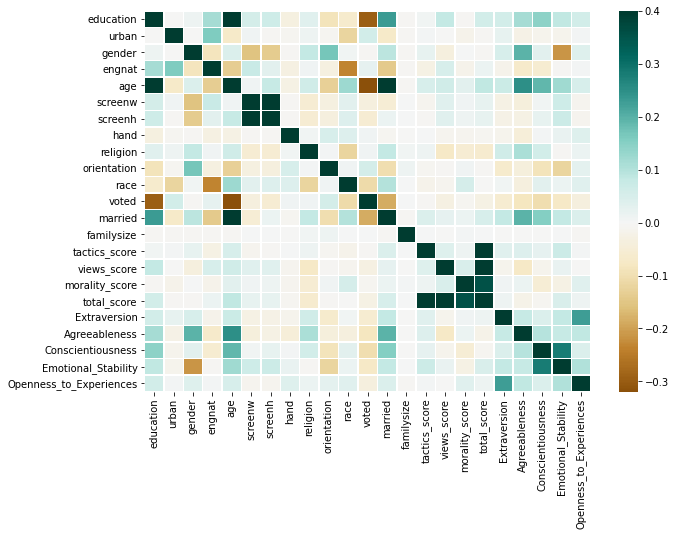

In [35]:
features_list1 = heatmap_data1.columns
cor_mat = heatmap_data1.loc[:, features_list1].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cor_mat, linewidths=.5, ax=ax, cmap="BrBG", center = 0, vmax = 0.4)
plt.show()

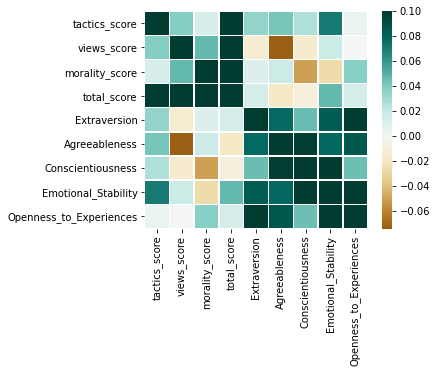

In [36]:
heatmap_data2 = data.loc[:, "tactics_score":]
features_list2 = heatmap_data2.columns
cor_mat = heatmap_data2.loc[:, features_list2].corr()
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cor_mat, linewidths=.5, ax=ax, cmap="BrBG", center = 0, vmax = 0.1)
plt.show()

In [37]:
heatmap_data2.loc[:, features_list2].corr()

,tactics_score,views_score,morality_score,total_score,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness_to_Experiences
tactics_score,1.000000,0.038563,0.012605,0.645452,0.034870,0.042607,0.027122,0.070868,0.004567
views_score,0.038563,1.000000,0.047490,0.719335,-0.014793,-0.074175,-0.015307,0.017963,0.000350
morality_score,0.012605,0.047490,1.000000,0.357342,0.010206,0.017509,-0.049853,-0.026299,0.037449
total_score,0.645452,0.719335,0.357342,1.000000,0.014623,-0.018712,-0.009548,0.047480,0.014929
Extraversion,0.034870,-0.014793,0.010206,0.014623,1.000000,0.077870,0.045842,0.084306,0.229151
Agreeableness,0.042607,-0.074175,0.017509,-0.018712,0.077870,1.000000,0.098606,0.079348,0.086345
Conscientiousness,0.027122,-0.015307,-0.049853,-0.009548,0.045842,0.098606,1.000000,0.280811,0.044345
Emotional_Stability,0.070868,0.017963,-0.026299,0.047480,0.084306,0.079348,0.280811,1.000000,0.104727
Openness_to_Experiences,0.004567,0.000350,0.037449,0.014929,0.229151,0.086345,0.044345,0.104727,1.000000


Correlations between Big Five and The MACH-IV scores seem to be below 0.1. 

In [38]:
heatmap_data3 = data.loc[:, "TIPI1":"TIPI10"]
heatmap_data3 = heatmap_data3.join(data.loc[:, "tactics_score":"total_score"])
heatmap_data3.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,tactics_score,views_score,morality_score,total_score
0,6,5,6,1,7,3,7,4,7,1,20.0,27.0,6.0,53.0
1,2,5,6,2,4,6,5,4,6,5,20.0,32.0,6.0,58.0
2,1,7,6,7,5,7,1,4,1,4,20.0,29.0,6.0,55.0
3,6,5,5,7,7,2,6,2,2,3,16.0,31.0,9.0,56.0
4,2,5,5,6,7,6,5,3,4,5,22.0,28.0,6.0,56.0


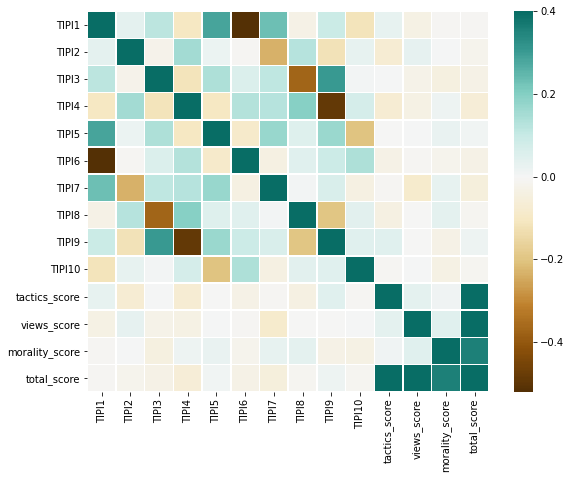

In [39]:
features_list3 = heatmap_data3.columns
cor_mat = heatmap_data3.loc[:, features_list3].corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cor_mat, linewidths=.5, ax=ax, cmap="BrBG", center = 0, vmax = 0.4)
plt.show()

In [40]:
heatmap_data3.loc[:, features_list3].corr()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,tactics_score,views_score,morality_score,total_score
TIPI1,1.000000,0.037987,0.116950,-0.104382,0.286344,-0.520530,0.232392,-0.029472,0.097927,-0.116349,0.031021,-0.033058,-0.002862,-0.004321
TIPI2,0.037987,1.000000,-0.021542,0.155583,0.021115,-0.007589,-0.233066,0.127716,-0.120491,0.032430,-0.071514,0.034657,0.004071,-0.019119
TIPI3,0.116950,-0.021542,1.000000,-0.117097,0.139168,0.059625,0.112376,-0.372045,0.303908,0.006601,0.004043,-0.027130,-0.044068,-0.029957
TIPI4,-0.104382,0.155583,-0.117097,1.000000,-0.101684,0.132563,0.126841,0.197761,-0.486656,0.070339,-0.074426,-0.031695,0.017779,-0.061716
TIPI5,0.286344,0.021115,0.139168,-0.101684,1.000000,-0.086941,0.172250,0.049171,0.169613,-0.202022,0.000683,0.003817,0.025257,0.011031
TIPI6,-0.520530,-0.007589,0.059625,0.132563,-0.086941,1.000000,-0.035186,0.044467,0.092249,0.139828,-0.029786,-0.007291,-0.020678,-0.029847
TIPI7,0.232392,-0.233066,0.112376,0.126841,0.172250,-0.035186,1.000000,0.005540,0.063185,-0.038390,-0.006793,-0.083223,0.032606,-0.050471
TIPI8,-0.029472,0.127716,-0.372045,0.197761,0.049171,0.044467,0.005540,1.000000,-0.194698,0.043624,-0.038428,0.000223,0.038987,-0.011121
TIPI9,0.097927,-0.120491,0.303908,-0.486656,0.169613,0.092249,0.063185,-0.194698,1.000000,0.045342,0.046509,-0.002307,-0.028070,0.018137
TIPI10,-0.116349,0.032430,0.006601,0.070339,-0.202022,0.139828,-0.038390,0.043624,0.045342,1.000000,-0.006010,0.002777,-0.032380,-0.012081


In [41]:
heatmap_data = data.drop(["introelapse", "testelapse", "surveyelapse"], axis = 1)
heatmap_data = heatmap_data.drop(heatmap_data.loc[:,'VCL1':'familysize'].head(0).columns, axis = 1)
for i in range(1, 21):
    heatmap_data = heatmap_data.drop(["Q" + str(i) + "I"], axis = 1)
    heatmap_data = heatmap_data.drop(["Q" + str(i) + "E"], axis = 1)
heatmap_data.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,country,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,major,tactics_score,views_score,morality_score,total_score,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness_to_Experiences
0,3.0,3.0,5.0,2.0,3.0,1.0,2.0,4.0,3.0,3.0,1.0,5.0,4.0,1.0,5.0,2.0,4.0,4.0,4.0,4.0,GB,6,5,6,1,7,3,7,4,7,1,marketing,20.0,27.0,6.0,53.0,11,10,10,14,14
1,5.0,5.0,1.0,3.0,5.0,1.0,1.0,4.0,2.0,1.0,1.0,5.0,5.0,2.0,5.0,1.0,2.0,4.0,5.0,3.0,US,2,5,6,2,4,6,5,4,6,5,mathematics,20.0,32.0,6.0,58.0,4,8,10,12,7
2,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,3.0,US,1,7,6,7,5,7,1,4,1,4,chemistry,20.0,29.0,6.0,55.0,2,2,10,2,9
3,2.0,4.0,2.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,1.0,5.0,1.0,1.0,4.0,1.0,1.0,5.0,3.0,4.0,CH,6,5,5,7,7,2,6,2,2,3,international relations,16.0,31.0,9.0,56.0,12,9,11,3,12
4,5.0,5.0,2.0,1.0,2.0,1.0,2.0,4.0,2.0,2.0,1.0,4.0,4.0,1.0,5.0,1.0,1.0,4.0,5.0,1.0,NL,2,5,5,6,7,6,5,3,4,5,management,22.0,28.0,6.0,56.0,4,8,10,6,10


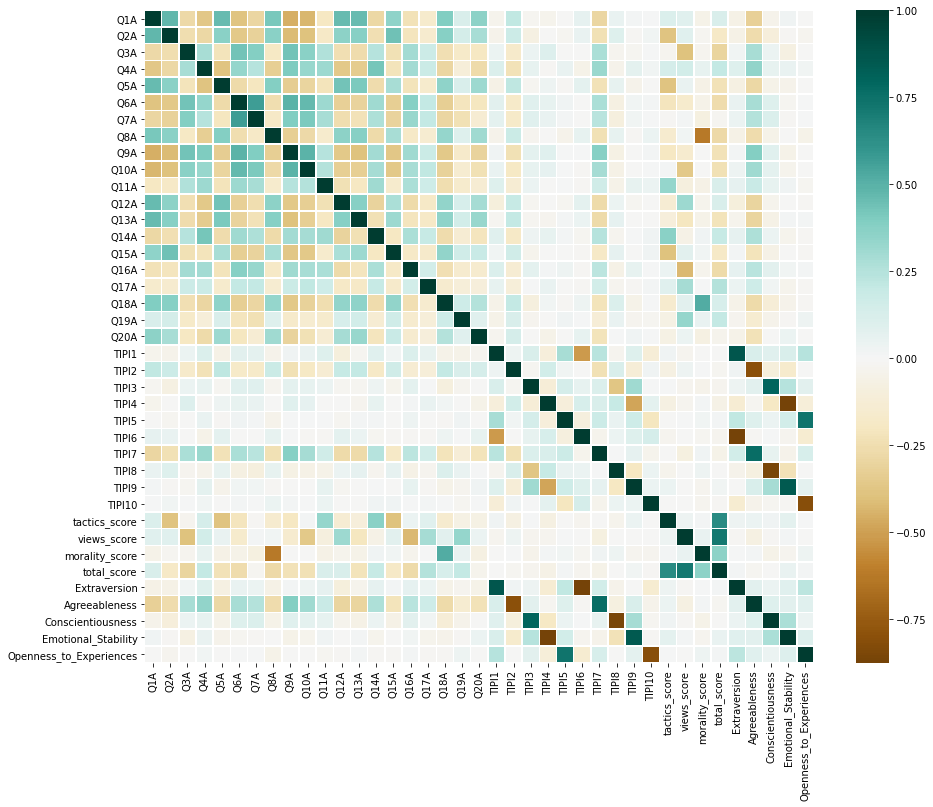

In [42]:
features_list = heatmap_data.columns
cor_mat = heatmap_data.loc[:, features_list].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cor_mat, linewidths=.5, ax=ax, cmap="BrBG", center = 0)
plt.show()

The heatmap is somehow close to the written about Agreeableness and Machiavellianism in the [wiki article](https://en.wikipedia.org/wiki/Machiavellianism_(psychology)#cite_note-Dark_Triad-28): Machiavellianism has been found to be negatively correlated with agreeableness (r = −0.47) and conscientiousness (r = −0.34), two dimensions of the "big five" personality model (NEO-PI-R). Also close to the official information in [this research](https://www.researchgate.net/publication/222828329_The_Dark_Triad_of_Personality_Narcissism_Machiavellianism_and_Psychopathy):

Big Five Inventory

| Trait | Narcissism  | Machiavellianism | Psychopathy |
| -: | -: | :-: | :-: |
| Extraversion | 0.42* | -0.05 | 0.34* |
| Agreeableness | -0.36* | -0.47* | -0.25* |
| Conscientiousness | -0.06 | -0.34* | -0.24* |
| Neuroticism | 0.02 | 0.12 | -0.34* |
| Openness | 0.38* | -0.03 | 0.24* |

*p<.01 (Source: Paulhus, D. L., & Williams, K. M. (2002). The dark triad of
personality: Narcissism, machiavellianism, and psychopathy. Journal of Research 
12
in Personality, 36(6), 556-563. doi:10.1016/S0092-6566(02)00505-6)

Our results are the following:

In [136]:
heatmap_data.loc[:, features_list].corr().index

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7',
       'TIPI8', 'TIPI9', 'TIPI10', 'tactics_score', 'views_score',
       'morality_score', 'total_score', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Emotional_Stability', 'Openness_to_Experiences'],
      dtype='object')

In [43]:
heatmap_data.loc[:, features_list].corr()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,tactics_score,views_score,morality_score,total_score,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness_to_Experiences
Q1A,1.000000,0.474294,-0.277354,-0.368143,0.459785,-0.377834,-0.290922,0.416529,-0.453881,-0.435041,-0.198035,0.458657,0.462446,-0.285838,0.354006,-0.229592,-0.162210,0.394300,0.119453,0.356263,-0.035225,0.210659,-0.025291,-0.037237,-0.008166,0.069074,-0.295682,0.051479,0.017154,0.005568,0.112161,0.089668,-0.050952,0.113860,-0.059795,-0.320826,-0.047441,0.032078,-0.008716
Q2A,0.474294,1.000000,-0.249655,-0.283525,0.364651,-0.359775,-0.316156,0.368414,-0.414725,-0.396505,-0.186416,0.357897,0.382657,-0.241984,0.438286,-0.210512,-0.151947,0.379949,0.145944,0.282554,-0.044065,0.176647,-0.074573,0.002297,-0.021803,0.053149,-0.237549,0.098400,-0.018182,0.024588,-0.382161,0.085641,-0.019236,-0.182930,-0.055743,-0.262596,-0.105341,-0.011439,-0.029999
Q3A,-0.277354,-0.249655,1.000000,0.285487,-0.220087,0.433090,0.388429,-0.189540,0.432680,0.369935,0.260969,-0.238347,-0.260186,0.252062,-0.237238,0.300448,0.176230,-0.241918,-0.179205,-0.198787,0.043547,-0.169699,0.044198,0.102124,-0.007024,0.003227,0.276706,-0.030585,-0.023159,0.008334,-0.031954,-0.395367,-0.028560,-0.297784,0.023141,0.282275,0.044490,-0.074780,-0.009950
Q4A,-0.368143,-0.283525,0.285487,1.000000,-0.379302,0.334333,0.249037,-0.327328,0.401338,0.329595,0.314105,-0.362901,-0.342589,0.424543,-0.219184,0.302348,0.180450,-0.290982,-0.110997,-0.269407,0.110929,-0.227716,0.055946,-0.014551,0.052970,-0.053736,0.319601,-0.047311,0.071596,0.018828,0.140623,0.150886,0.055673,0.206860,0.094450,0.346789,0.061877,0.048387,0.018496
Q5A,0.459785,0.364651,-0.220087,-0.379302,1.000000,-0.272318,-0.205396,0.385775,-0.334390,-0.298594,-0.216761,0.433854,0.407095,-0.266172,0.283473,-0.223200,-0.164778,0.353444,0.125026,0.311959,-0.055571,0.218937,-0.024742,0.035255,-0.014741,0.069566,-0.230377,0.060547,-0.043239,-0.001769,-0.391365,0.050166,-0.056914,-0.224688,-0.071752,-0.285841,-0.053001,-0.045286,-0.007550
Q6A,-0.377834,-0.359775,0.433090,0.334333,-0.272318,1.000000,0.574327,-0.248046,0.494880,0.471670,0.315849,-0.321903,-0.304695,0.309580,-0.330774,0.377556,0.205788,-0.331517,-0.210393,-0.206349,0.078674,-0.174465,0.087257,0.058268,0.029072,-0.005035,0.276114,-0.074962,0.023345,0.011314,-0.216345,-0.163593,-0.049735,-0.260209,0.048034,0.285028,0.097267,-0.022469,0.009473
Q7A,-0.290922,-0.316156,0.388429,0.249037,-0.205396,0.574327,1.000000,-0.180089,0.394106,0.411747,0.283614,-0.245724,-0.226164,0.271156,-0.308932,0.330085,0.205477,-0.294153,-0.233012,-0.138617,0.072334,-0.174597,0.089674,0.047471,0.017037,-0.000039,0.233068,-0.091703,0.018746,0.006892,-0.016927,0.017541,-0.080377,-0.023977,0.041532,0.258482,0.109448,-0.018456,0.005370
Q8A,0.416529,0.368414,-0.189540,-0.327328,0.385775,-0.248046,-0.180089,1.000000,-0.330738,-0.281341,-0.162830,0.355967,0.378617,-0.270144,0.285202,-0.182870,-0.149579,0.337702,0.098476,0.310239,-0.040658,0.185092,-0.031293,0.002944,-0.041765,0.058281,-0.234142,0.058002,-0.013344,0.040689,-0.151996,0.022317,-0.626541,-0.277104,-0.056728,-0.266016,-0.055016,-0.009159,-0.053027
Q9A,-0.453881,-0.414725,0.432680,0.401338,-0.334390,0.494880,0.394106,-0.330738,1.000000,0.490450,0.246348,-0.356566,-0.395158,0.302131,-0.367249,0.308659,0.184279,-0.360069,-0.165473,-0.309780,0.031603,-0.236937,0.074217,0.085577,0.010710,0.004804,0.381386,-0.067222,-0.000988,0.013552,-0.198048,-0.151901,0.001556,-0.224723,0.015383,0.391051,0.084971,-0.052487,-0.003006
Q10A,-0.435041,-0.396505,0.369935,0.329595,-0.298594,0.471670,0.411747,-0.281341,0.490450,1.000000,0.252969,-0.328610,-0.327679,0.291280,-0.360931,0.288382,0.208717,-0.315443,-0.145342,-0.235117,0.052122,-0.188606,0.060608,0.063647,0.008063,-0.012057,0.295169,-0.058973,-0.000877,0.008557,0.016163,-0.356680,-0.006254,-0.234777,0.036

Let's explore some demographic dependancies below:

In [44]:
#data.age[data.age > 90] = data.age.mean()

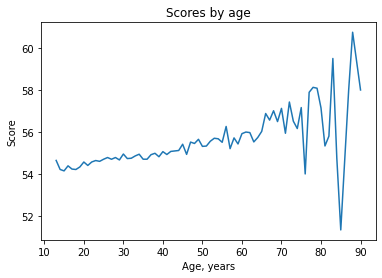

In [45]:
mean_score_by_age = data.total_score.groupby(data.age).mean()

plt.plot(mean_score_by_age.index, mean_score_by_age.values)
plt.title("Scores by age")
plt.xlabel("Age, years")
plt.ylabel("Score")
plt.show()

Sample sizes get a little bit low for the higher ages (for age > 70) so there is some noise on the right hand side of the graph, but the trend is pretty clear. Machiavellianism increases with age.

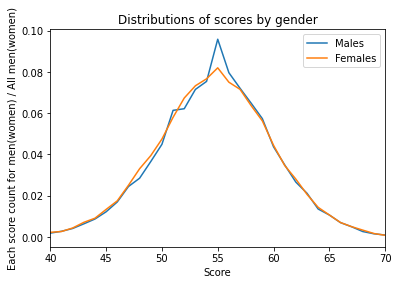

In [46]:
score_by_gender_male = data[data.gender == 1]
score_by_gender_male = score_by_gender_male.total_score.groupby(score_by_gender_male.total_score).count()
score_by_gender_female = data[data.gender == 2]
score_by_gender_female = score_by_gender_female.total_score.groupby(score_by_gender_female.total_score).count()


plt.plot(score_by_gender_male.index, score_by_gender_male.values/len(data[data.gender == 1]), label = "Males")
plt.plot(score_by_gender_female.index, score_by_gender_female.values/len(data[data.gender == 2]), label = "Females")

plt.title("Distributions of scores by gender")
plt.legend()
plt.xlabel("Score")
plt.ylabel("Each score count for men(women) / All men(women)")
plt.xlim(left = 40, right = 70)
plt.show()

In [47]:
print("N( Male, Female ) = (", data[data.gender == 1].count()[1], ", ", data[data.gender == 2].count()[1], ")")

N( Male, Female ) = ( 39640 ,  32873 )


In [48]:
data.total_score[data.gender == 1].mean(), data.total_score[data.gender == 2].mean()

(54.77946518668012, 54.685243208712315)

Scores are pretty much equally distributed, but still men got slightly higher score(especially in the score range from 45 to 60). This fits with the general stereotype of women being nicer than men. 

In [49]:
religion_labels = ['Not stated', 'Agnostic', 'Atheist', 'Buddhist', 'Christian (Catholic)', 'Christian (Mormon)', 'Christian (Protestant)', 'Christian (Other)', 'Hindu', 'Jewish', 'Muslim', 'Sikh', 'Other']
race_labels = ['Not stated', 'Asian', 'Arab', 'Black', 'Indigenous Australian', 'Native American', 'White', 'Other']
married_labels = ['Not stated', 'Never married', 'Currently married', 'Previously married']
education_labels = ['Not stated', 'Less than high school', 'High school', 'University degree', 'Graduate degree']
orientation_labels = ['Not stated', 'Heterosexual', 'Bisexual', 'Homosexual', 'Asexual', 'Other']
urban_labels = ['Not stated', 'Rural (country side)', 'Suburban', 'Urban (town, city)']

In [50]:
def make_barh(column, labels):
    result = data.total_score.groupby(column).mean()
    column_name = column.name
    
    data_for_sorting = {'category': labels, 'n': data.total_score.groupby(column).count().values, 'score': result.values}
    dataset = pd.DataFrame(data = data_for_sorting)
    dataset = dataset.sort_values(by=['score'])

    plt.barh(dataset.category, dataset.score)
    plt.title("Mean scores by " + column_name)
    plt.xlabel("score")
    plt.ylabel(column_name)
    plt.xlim(left = 52, right = 56)
    plt.xticks()
    plt.yticks(np.arange(len(dataset.category)), labels = dataset.category)
    plt.grid(which = 'both', axis = 'x')
    plt.show()
    for i in range(len(dataset.category)):
        print(dataset.category[i], dataset.n[i], sep=': ', end='. ', flush=True)

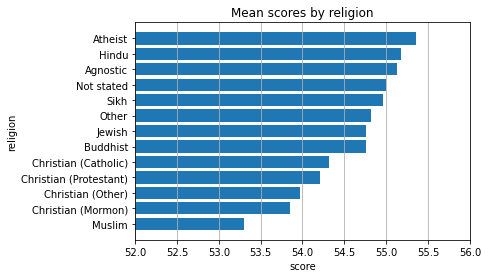

Not stated: 1137. Agnostic: 15112. Atheist: 17231. Buddhist: 1505. Christian (Catholic): 9976. Christian (Mormon): 600. Christian (Protestant): 7111. Christian (Other): 7827. Hindu: 2045. Jewish: 754. Muslim: 2539. Sikh: 165. Other: 7454. 

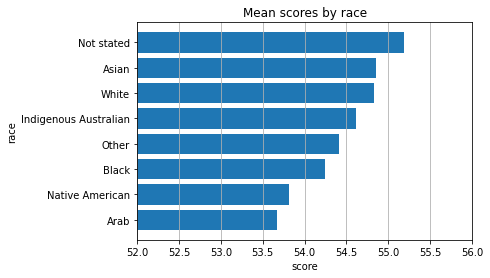

Not stated: 1109. Asian: 10809. Arab: 1053. Black: 3585. Indigenous Australian: 75. Native American: 815. White: 48688. Other: 7322. 

In [51]:
make_barh(data.religion, religion_labels)
make_barh(data.race, race_labels)

It is pretty obvious that Atheists got the highest scores on Machiavellism and Muslim(which is one of the religions with [most devoted pupils](https://en.wikipedia.org/wiki/Importance_of_religion_by_country)) got the lowest scores. It is confirmed by the lower plot, reffering the race. This definitely rises some moral and ethical questions. 

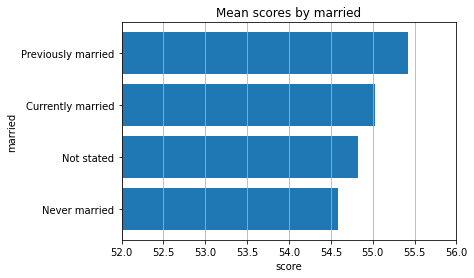

Not stated: 290. Never married: 52523. Currently married: 14995. Previously married: 5648. 

In [52]:
make_barh(data.married, married_labels)

This results could be a sign that people with higher score on Machiavellism are more likely to get divorced. A refference to the low Agreeableness could be made here. Because people with higher score on MACH-IV got lower scores for Agreeableness ot their own Ten Item Personality Inventory according to the heatmap above!

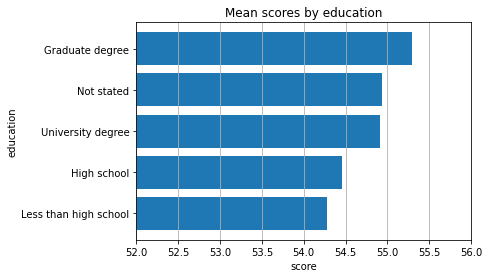

Not stated: 879. Less than high school: 7967. High school: 27084. University degree: 24780. Graduate degree: 12746. 

In [53]:
make_barh(data.education, education_labels)

Seems like higher education got you a higher score on Machiavellism.

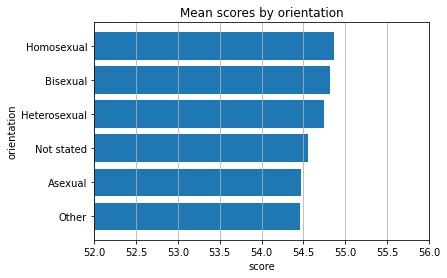

Not stated: 1411. Heterosexual: 56567. Bisexual: 8847. Homosexual: 2995. Asexual: 1708. Other: 1928. 

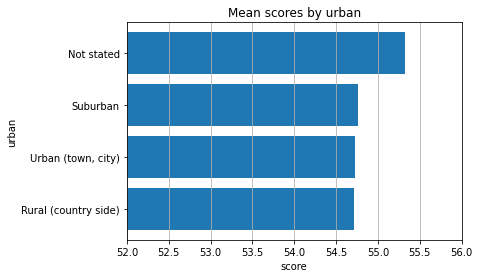

Not stated: 630. Rural (country side): 14116. Suburban: 27946. Urban (town, city): 30764. 

In [54]:
make_barh(data.orientation, orientation_labels)
make_barh(data.urban, urban_labels)

Differences in distribution of mean scores by sexual orientation and the type of area, where lived in childhood is small.

It would be informative if we could see the distribution of total score of Machiavellism on the world map by countries. We will need some extra information about the countries to plot the map, so we need to read [this file](https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv) and make some extra data processing below:

In [55]:
scores_by_country = data.total_score.groupby(data.country).mean().sort_values(ascending = False)

In [56]:
country_dataframe = pd.DataFrame(data = scores_by_country)
country_dataframe = country_dataframe.reset_index()

In [57]:
countries_codes_and_coordinates = pd.read_csv("https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv")
countries_codes_and_coordinates = countries_codes_and_coordinates.drop("Numeric code", axis = 'columns')
countries_codes_and_coordinates.columns = ['full_name', 'country', 'A3', 'lat', 'lon']
for i in countries_codes_and_coordinates.columns:
    countries_codes_and_coordinates[i] = countries_codes_and_coordinates[i].str.replace(r' "',"")
    countries_codes_and_coordinates[i] = countries_codes_and_coordinates[i].str.replace(r'"',"")

In [58]:
merged_country_info = pd.merge(country_dataframe, countries_codes_and_coordinates, on = 'country')

In [59]:
merged_country_info.lat = pd.to_numeric(merged_country_info.lat)
merged_country_info.lon = pd.to_numeric(merged_country_info.lon)
merged_country_info

,country,total_score,full_name,A3,lat,lon
0,VI,68.000000,"Virgin Islands, U.S.",VIR,18.3333,-64.8333
1,VU,64.000000,Vanuatu,VUT,-16.0000,167.0000
2,UZ,63.333333,Uzbekistan,UZB,41.0000,64.0000
3,MP,60.000000,Northern Mariana Islands,MNP,15.2000,145.7500
4,DJ,59.000000,Djibouti,DJI,11.5000,43.0000
5,MO,59.000000,Macao,MAC,22.1667,113.5500
6,LR,58.750000,Liberia,LBR,6.5000,-9.5000
7,MD,58.500000,"Moldova, Republic of",MDA,47.0000,29.0000
8,LI,58.500000,Liechtenstein,LIE,47.1667,9.5333
9,AS,58.500000,American Samoa,ASM,-14.3333,-170.0000


In [60]:
fig = px.choropleth(merged_country_info,
                    locations = 'A3',
                    color = 'total_score',
                    hover_name = 'full_name',
                    locationmode = 'ISO-3', # In ISO-3 we could find the Alpha 3 country abbriviation
                    color_continuous_scale = 'edge')
fig.update_layout(title_text = 'Score Rankings',
                  title_x = 0.5,
                  geo_scope = 'world',
                  geo = dict(showframe = False, showcoastlines = False))
fig.show()

In [61]:
profession = data.total_score.groupby(data.major).mean()
profession = profession.sort_values()
profession

major
 d modeling and animation                        34.000000
business computing                               35.000000
teacher of english                               35.000000
pharmaceutical science                           36.000000
mathematics and statistics                       36.000000
engineernig                                      36.000000
medical technology   science and math            37.000000
biblical studies music                           38.000000
theology  bible  geology                         38.000000
behaviorism                                      38.000000
fluid power                                      38.000000
information systems management                   38.000000
political science and english                    38.000000
english german                                   38.000000
garden design                                    38.000000
psychology   criminal justice   forensic psyc    39.000000
psychology  marketing                            3

In [62]:
data.country[data.country == "BG"].count()

251

In [63]:
data[data.age <= 25].count()[1]

37406

### Data Modeling - Neural Network

First we will try to predict total score on Machiavellism according to MACH-IV, having the other data. Model would converge slowly, if the inputs are not normalized, so we need to reduce data redundancy and scale the data. Total score comes directly from `Q1` to `Q20`, so we will drop all these columns and try to model the data towards the rest of the features. Analogically for the columns from `Extraversion` to `Openness_to_Experiences`. For now we will drop column `major`, too.

If a feature in the dataset is big in scale compared to others then this big scaled feature becomes dominating and as a result of that, predictions of the Neural Network will not be accurate. Front propagation of Neural Networks involves the [Dot Product](https://stats.stackexchange.com/questions/291680/can-any-one-explain-why-dot-product-is-used-in-neural-network-and-what-is-the-in) of weights with input features. So, if the values are very high, calculation of output takes a lot of computation time as well as memory. Same is the case during back propagation. This would lead to slow model convergence.[$^{[]}$](https://stackoverflow.com/questions/4674623/why-do-we-have-to-normalize-the-input-for-an-artificial-neural-network)


In [64]:
clean_data = data.loc[:, 'country':'total_score']
clean_data = clean_data.drop(["tactics_score", "views_score", "morality_score"], axis = 1)
clean_data = clean_data.drop(["major"], axis = 1)


There are several was to treat categorical data, aiming to aid algorithms and to improve efficiency. [This article](https://www.researchgate.net/profile/Kedar_Potdar/publication/320465713_A_Comparative_Study_of_Categorical_Variable_Encoding_Techniques_for_Neural_Network_Classifiers/links/59e6f9554585151e5465859c/A-Comparative-Study-of-Categorical-Variable-Encoding-Techniques-for-Neural-Network-Classifiers.pdf) is comparing the accuracy of different encoding techniques. The results are:

|Encoding Technique| Accuracy (Percentage)|
|-:|:-:|
|One Hot Coding| 90 |21
|Ordinal Coding| 81 |6
|Sum Coding| 95 |21
|Helmert Coding| 89 |21
|Polynomial Coding| 91 |21
|Backward Difference Coding| 95 |21
|Binary Coding| 90 |12

It seems rational in our case to choose Binary Coding where in binary coding, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. This results in 276 columns in our case. May be there is a likelhood of multicollinearity (the dummy variable trap) and high variance, but let's see.

In [65]:
clean_data = pd.get_dummies(data=clean_data, columns=['country', 'education', 'urban', 'gender', 'engnat', 'hand', 'religion', 'orientation', 'race', 'voted', 'married'])

In [66]:
clean_data.shape

(73456, 276)

In [67]:
clean_data.head()

,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,age,screenw,screenh,familysize,total_score,country_AE,country_AF,country_AG,country_AL,country_AM,country_AO,country_AR,country_AS,country_AT,country_AU,country_AZ,country_BA,country_BB,country_BD,country_BE,country_BG,country_BH,country_BJ,country_BM,country_BN,country_BO,country_BQ,country_BR,country_BS,country_BT,country_BW,country_BY,country_BZ,country_CA,country_CD,country_CH,country_CI,country_CL,country_CM,country_CN,country_CO,country_CR,country_CU,country_CW,country_CY,country_CZ,country_DE,country_DJ,country_DK,country_DO,country_DZ,country_EC,country_EE,country_EG,country_ES,country_ET,country_FI,country_FJ,country_FO,country_FR,country_GA,country_GB,country_GD,country_GE,country_GF,country_GG,country_GH,country_GI,country_GL,country_GM,country_GP,country_GR,country_GT,country_GU,country_GY,country_HK,country_HN,country_HR,country_HT,country_HU,country_ID,country_IE,country_IL,country_IM,country_IN,country_IQ,country_IR,country_IS,country_IT,country_JE,country_JM,country_JO,country_JP,country_KE,country_KG,country_KH,country_KN,country_KR,country_KW,country_KY,country_KZ,country_LA,country_LB,country_LC,country_LI,country_LK,country_LR,country_LS,country_LT,country_LU,country_LV,country_LY,country_MA,country_MC,country_MD,country_ME,country_MG,country_MK,country_ML,country_MM,country_MN,country_MO,country_MP,country_MQ,country_MT,country_MU,country_MV,country_MW,country_MX,country_MY,country_MZ,country_NG,country_NI,country_NL,country_NO,country_NONE,country_NP,country_NR,country_NZ,country_OM,country_PA,country_PE,country_PF,country_PG,country_PH,country_PK,country_PL,country_PR,country_PS,country_PT,country_PY,country_QA,country_RE,country_RO,country_RS,country_RU,country_RW,country_SA,country_SC,country_SD,country_SE,country_SG,country_SI,country_SK,country_SN,country_SO,country_SR,country_SV,country_SY,country_TD,country_TH,country_TJ,country_TL,country_TN,country_TO,country_TR,country_TT,country_TW,country_TZ,country_UA,country_UG,country_UNKNOWN,country_US,country_UY,country_UZ,country_VC,country_VE,country_VI,country_VN,country_VU,country_ZA,country_ZM,country_ZW,education_0,education_1,education_2,education_3,education_4,urban_0,urban_1,urban_2,urban_3,gender_0,gender_1,gender_2,gender_3,engnat_0,engnat_1,engnat_2,hand_0,hand_1,hand_2,hand_3,religion_0,religion_1,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,religion_8,religion_9,religion_10,religion_11,religion_12,orientation_0,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,race_0,race_10,race_20,race_30,race_40,race_50,race_60,race_70,voted_0,voted_1,voted_2,married_0,married_1,married_2,married_3
0,49.0,328.0,426,6,5,6,1,7,3,7,4,7,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,26,1440.0,900.0,5,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,38.0,143.0,150,2,5,6,2,4,6,5,4,6,5,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,18,1536.0,864.0,2,58.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,4.0

In [68]:
clean_data[clean_data.isna().any(axis=1)].head()

,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,age,screenw,screenh,familysize,total_score,country_AE,country_AF,country_AG,country_AL,country_AM,country_AO,country_AR,country_AS,country_AT,country_AU,country_AZ,country_BA,country_BB,country_BD,country_BE,country_BG,country_BH,country_BJ,country_BM,country_BN,country_BO,country_BQ,country_BR,country_BS,country_BT,country_BW,country_BY,country_BZ,country_CA,country_CD,country_CH,country_CI,country_CL,country_CM,country_CN,country_CO,country_CR,country_CU,country_CW,country_CY,country_CZ,country_DE,country_DJ,country_DK,country_DO,country_DZ,country_EC,country_EE,country_EG,country_ES,country_ET,country_FI,country_FJ,country_FO,country_FR,country_GA,country_GB,country_GD,country_GE,country_GF,country_GG,country_GH,country_GI,country_GL,country_GM,country_GP,country_GR,country_GT,country_GU,country_GY,country_HK,country_HN,country_HR,country_HT,country_HU,country_ID,country_IE,country_IL,country_IM,country_IN,country_IQ,country_IR,country_IS,country_IT,country_JE,country_JM,country_JO,country_JP,country_KE,country_KG,country_KH,country_KN,country_KR,country_KW,country_KY,country_KZ,country_LA,country_LB,country_LC,country_LI,country_LK,country_LR,country_LS,country_LT,country_LU,country_LV,country_LY,country_MA,country_MC,country_MD,country_ME,country_MG,country_MK,country_ML,country_MM,country_MN,country_MO,country_MP,country_MQ,country_MT,country_MU,country_MV,country_MW,country_MX,country_MY,country_MZ,country_NG,country_NI,country_NL,country_NO,country_NONE,country_NP,country_NR,country_NZ,country_OM,country_PA,country_PE,country_PF,country_PG,country_PH,country_PK,country_PL,country_PR,country_PS,country_PT,country_PY,country_QA,country_RE,country_RO,country_RS,country_RU,country_RW,country_SA,country_SC,country_SD,country_SE,country_SG,country_SI,country_SK,country_SN,country_SO,country_SR,country_SV,country_SY,country_TD,country_TH,country_TJ,country_TL,country_TN,country_TO,country_TR,country_TT,country_TW,country_TZ,country_UA,country_UG,country_UNKNOWN,country_US,country_UY,country_UZ,country_VC,country_VE,country_VI,country_VN,country_VU,country_ZA,country_ZM,country_ZW,education_0,education_1,education_2,education_3,education_4,urban_0,urban_1,urban_2,urban_3,gender_0,gender_1,gender_2,gender_3,engnat_0,engnat_1,engnat_2,hand_0,hand_1,hand_2,hand_3,religion_0,religion_1,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,religion_8,religion_9,religion_10,religion_11,religion_12,orientation_0,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,race_0,race_10,race_20,race_30,race_40,race_50,race_60,race_70,voted_0,voted_1,voted_2,married_0,married_1,married_2,married_3


In [69]:
clean_data[clean_data.country_BQ == 1]

,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,age,screenw,screenh,familysize,total_score,country_AE,country_AF,country_AG,country_AL,country_AM,country_AO,country_AR,country_AS,country_AT,country_AU,country_AZ,country_BA,country_BB,country_BD,country_BE,country_BG,country_BH,country_BJ,country_BM,country_BN,country_BO,country_BQ,country_BR,country_BS,country_BT,country_BW,country_BY,country_BZ,country_CA,country_CD,country_CH,country_CI,country_CL,country_CM,country_CN,country_CO,country_CR,country_CU,country_CW,country_CY,country_CZ,country_DE,country_DJ,country_DK,country_DO,country_DZ,country_EC,country_EE,country_EG,country_ES,country_ET,country_FI,country_FJ,country_FO,country_FR,country_GA,country_GB,country_GD,country_GE,country_GF,country_GG,country_GH,country_GI,country_GL,country_GM,country_GP,country_GR,country_GT,country_GU,country_GY,country_HK,country_HN,country_HR,country_HT,country_HU,country_ID,country_IE,country_IL,country_IM,country_IN,country_IQ,country_IR,country_IS,country_IT,country_JE,country_JM,country_JO,country_JP,country_KE,country_KG,country_KH,country_KN,country_KR,country_KW,country_KY,country_KZ,country_LA,country_LB,country_LC,country_LI,country_LK,country_LR,country_LS,country_LT,country_LU,country_LV,country_LY,country_MA,country_MC,country_MD,country_ME,country_MG,country_MK,country_ML,country_MM,country_MN,country_MO,country_MP,country_MQ,country_MT,country_MU,country_MV,country_MW,country_MX,country_MY,country_MZ,country_NG,country_NI,country_NL,country_NO,country_NONE,country_NP,country_NR,country_NZ,country_OM,country_PA,country_PE,country_PF,country_PG,country_PH,country_PK,country_PL,country_PR,country_PS,country_PT,country_PY,country_QA,country_RE,country_RO,country_RS,country_RU,country_RW,country_SA,country_SC,country_SD,country_SE,country_SG,country_SI,country_SK,country_SN,country_SO,country_SR,country_SV,country_SY,country_TD,country_TH,country_TJ,country_TL,country_TN,country_TO,country_TR,country_TT,country_TW,country_TZ,country_UA,country_UG,country_UNKNOWN,country_US,country_UY,country_UZ,country_VC,country_VE,country_VI,country_VN,country_VU,country_ZA,country_ZM,country_ZW,education_0,education_1,education_2,education_3,education_4,urban_0,urban_1,urban_2,urban_3,gender_0,gender_1,gender_2,gender_3,engnat_0,engnat_1,engnat_2,hand_0,hand_1,hand_2,hand_3,religion_0,religion_1,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,religion_8,religion_9,religion_10,religion_11,religion_12,orientation_0,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,race_0,race_10,race_20,race_30,race_40,race_50,race_60,race_70,voted_0,voted_1,voted_2,married_0,married_1,married_2,married_3
2728,6.0,142.0,177,3,6,3,6,3,1,3,6,5,3,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,19,1920.0,1080.0,3,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0


Data needs to be splitted into training, validation and testing set. First of all we need to be sure aur data is shuffled, as we want to skip the scenario where some of the sets is saturated with definite type of data. As we have a lot of features to input, we could expect a high variance, so we prefer a bigger training set. 

In [70]:
train_data = []
val_data = []
test_data = []
for group_label, data in clean_data.groupby("total_score"):
    shuffled_data = data.sample(len(data))
    val_in_group = shuffled_data.iloc[:700]
    test_in_group = shuffled_data.iloc[700:1000]
    train_in_group = shuffled_data.iloc[1000:]
    
    train_data.append(train_in_group)
    val_data.append(val_in_group)
    test_data.append(test_in_group)

In [71]:
def merge_and_shuffle(dataset):
    """
    Merges and shuffles the dataset.
    """
    result = pd.concat(dataset)
    return result.sample(len(result))

In [72]:
train_data = merge_and_shuffle(train_data)
val_data = merge_and_shuffle(val_data)
test_data = merge_and_shuffle(test_data)

In [73]:
train_data.shape, val_data.shape, test_data.shape

((49338, 276), (18111, 276), (6007, 276))

We need to separate the target from the features:

In [74]:
def split_target(dataset):
    """
    Splits the dataset into features and target and returns tuple.
    """
    return (dataset.drop("total_score", axis = 1), dataset.total_score)

In [75]:
train_features, train_target = split_target(train_data)
val_features, val_target = split_target(val_data)
test_features, test_target = split_target(test_data)

In [76]:
type(train_features)

pandas.core.frame.DataFrame

In [77]:
train_features[train_features.isna().any(axis=1)].head()

,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,age,screenw,screenh,familysize,country_AE,country_AF,country_AG,country_AL,country_AM,country_AO,country_AR,country_AS,country_AT,country_AU,country_AZ,country_BA,country_BB,country_BD,country_BE,country_BG,country_BH,country_BJ,country_BM,country_BN,country_BO,country_BQ,country_BR,country_BS,country_BT,country_BW,country_BY,country_BZ,country_CA,country_CD,country_CH,country_CI,country_CL,country_CM,country_CN,country_CO,country_CR,country_CU,country_CW,country_CY,country_CZ,country_DE,country_DJ,country_DK,country_DO,country_DZ,country_EC,country_EE,country_EG,country_ES,country_ET,country_FI,country_FJ,country_FO,country_FR,country_GA,country_GB,country_GD,country_GE,country_GF,country_GG,country_GH,country_GI,country_GL,country_GM,country_GP,country_GR,country_GT,country_GU,country_GY,country_HK,country_HN,country_HR,country_HT,country_HU,country_ID,country_IE,country_IL,country_IM,country_IN,country_IQ,country_IR,country_IS,country_IT,country_JE,country_JM,country_JO,country_JP,country_KE,country_KG,country_KH,country_KN,country_KR,country_KW,country_KY,country_KZ,country_LA,country_LB,country_LC,country_LI,country_LK,country_LR,country_LS,country_LT,country_LU,country_LV,country_LY,country_MA,country_MC,country_MD,country_ME,country_MG,country_MK,country_ML,country_MM,country_MN,country_MO,country_MP,country_MQ,country_MT,country_MU,country_MV,country_MW,country_MX,country_MY,country_MZ,country_NG,country_NI,country_NL,country_NO,country_NONE,country_NP,country_NR,country_NZ,country_OM,country_PA,country_PE,country_PF,country_PG,country_PH,country_PK,country_PL,country_PR,country_PS,country_PT,country_PY,country_QA,country_RE,country_RO,country_RS,country_RU,country_RW,country_SA,country_SC,country_SD,country_SE,country_SG,country_SI,country_SK,country_SN,country_SO,country_SR,country_SV,country_SY,country_TD,country_TH,country_TJ,country_TL,country_TN,country_TO,country_TR,country_TT,country_TW,country_TZ,country_UA,country_UG,country_UNKNOWN,country_US,country_UY,country_UZ,country_VC,country_VE,country_VI,country_VN,country_VU,country_ZA,country_ZM,country_ZW,education_0,education_1,education_2,education_3,education_4,urban_0,urban_1,urban_2,urban_3,gender_0,gender_1,gender_2,gender_3,engnat_0,engnat_1,engnat_2,hand_0,hand_1,hand_2,hand_3,religion_0,religion_1,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,religion_8,religion_9,religion_10,religion_11,religion_12,orientation_0,orientation_1,orientation_2,orientation_3,orientation_4,orientation_5,race_0,race_10,race_20,race_30,race_40,race_50,race_60,race_70,voted_0,voted_1,voted_2,married_0,married_1,married_2,married_3


Convergence is usually faster if the average of each input variable over the dataset is close to zero and also if the inputs are scaled so that all have about the same covariance - ususally a covariance of 1 is a good choice.[[]](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf) To run tenforflow without problems, all columns should be type `float64`.

In [78]:
num_columns = train_features.shape[1]

In [79]:
# def scale(dataset):
#     """
#     Scaling the data using Standard score(z-score or like SandardScaler in skitlearn).
#     """
#     mean, std = dataset.mean(), dataset.std() 
#     dataset = (dataset - mean) / std  
#     return dataset.astype(np.float64)

In [80]:
standard_scale = lambda col: (col - tf.math.reduce_mean(col)) / (tf.math.reduce_std(col)) #Scaling the data using Standard score(z-score or like SandardScaler in skitlearn).

In [81]:
transformed_cols_train_features = [standard_scale(train_features.values[:, i]) for i in range(num_columns)]
transformed_cols_val_features = [standard_scale(val_features.values[:, i]) for i in range(num_columns)]
transformed_cols_test_features = [standard_scale(test_features.values[:, i]) for i in range(num_columns)]

In [82]:
train_features = tf.stack(transformed_cols_train_features, axis = 1)
val_features = tf.stack(transformed_cols_val_features, axis = 1)
test_features = tf.stack(transformed_cols_test_features, axis = 1)

In [83]:
with np.printoptions(threshold=1000):
  print(tf.math.is_nan(train_features))

tf.Tensor(
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]], shape=(49338, 275), dtype=bool)


We could experience some nan values, because some of the countries are met only once in the dataset. We could replace the nans with zeroes[[]](https://xspdf.com/resolution/58791048.html) with the following function:

In [84]:
def replacenan(t): return tf.where(tf.math.is_nan(t), tf.zeros_like(t), t)

In [85]:
train_features = replacenan(train_features)
val_features = replacenan(val_features)
test_features = replacenan(test_features)

In [86]:
#train_features[train_features.isna().any(axis=1)].head()

Tensorflow works with arrays, so we have to transform the data into arrays:

In [87]:
# train_features, train_target = train_features.values, train_target.values
# val_features, val_target = val_features.values, val_target.values
# test_features, test_target = test_features.values, test_target.values

In [88]:
# array_sum = np.sum(train_features)
# array_has_nan = np.isnan(array_sum)
# print(array_has_nan)

At each iteration it is required a complete pass through the entire dataset in order to compute the average or true gradient. Using stochastic learning where a single example is chosen from the training set at each iteration(batch size = 1), this estimate of the gradient is noisy, the weights may not move precisely down the gradient at each iteration. Using batch trainig we removes that noise and the conditions if convergence are well understood. Stochastic learning is often the prefered method particularly when dealing with very large data sets because it is much faster. It can also been used in online learning and keeps tracking changes. [[]](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)
Tensorflow has a default argument values - If unspecified, batch_size will default to 32.[[]](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

Nonlinear activation functions are what give neural networks their nonlinear capabilities. To turn the network's calculation into a probability value between -1 and 1, we have to pass the value from the output layer through a “tanh” formula. Sigmoid squashes the output value of a neuron to between -1 and 1 according to a specific curve.[[]](http://jalammar.github.io/feedforward-neural-networks-visual-interactive/)

The Rectified Linear Unit(ReLu) has become very popular in the last few years, but unfortunately, ReLU units can be fragile during training and can “die”. We may end up with a lot of zeroes and actually we may find that as much as 40% of your network can be “dead” (i.e. neurons that never activate across the entire training dataset) if the learning rate is set too high.[[]](https://cs231n.github.io/neural-networks-1/)

Sigmoids that are symetric about the orign(tanh) are preferred for the same reason that inputs should be normalized, namely because they are more likely to produce outputs(which are inputs to the next layer) that are on average close to zero.[[]](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

The starting values of the weights can have a significant effect on the training process. Weights should be chosen randomly but in such a way that the tanh is primarily activated in its linear region. If the weights are all very large then the tanh will saturate resulting in small gradients that make learning slow. The default kernel initialiser is GlorotUniform that draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units in the weight tensor and fan_out is the number of output units).[[]](https://keras.io/api/layers/initializers/)

In [89]:
hyperparams = {
    "dropout_rate": 0.4,
    "batch_size": 64,
    "learning_rate": 0.01
}

In [90]:
neural_network = Sequential([
    Input(shape = num_columns),
    Dense(50, activation = "tanh",
          kernel_initializer=tf.keras.initializers.GlorotNormal(),
          kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01),
          bias_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)),
    Dropout(hyperparams["dropout_rate"]),
    
    BatchNormalization(),
    Dense(20, activation = "tanh"),
    Dropout(hyperparams["dropout_rate"]),
    
    BatchNormalization(),
    Dense(10, activation = "tanh"),
    Dropout(hyperparams["dropout_rate"]),
    
    Dense(1)
])

In [91]:
neural_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                13800     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

In [92]:
neural_network.compile(optimizer = Adam(hyperparams["learning_rate"]), loss = "mse")

In [93]:
history = neural_network.fit(
    x = train_features,
    y = train_target,
    validation_data = (val_features, val_target),
    epochs = 10,
    batch_size = hyperparams["batch_size"])

    #callbacks = [TensorBoard()])

Epoch 1/10
771/771 [==============================] - 4s 3ms/step - loss: 1337.6611 - val_loss: 78.8705
Epoch 2/10
771/771 [==============================] - 2s 3ms/step - loss: 172.7343 - val_loss: 69.0534
Epoch 3/10
771/771 [==============================] - 2s 3ms/step - loss: 163.2418 - val_loss: 68.8102
Epoch 4/10
771/771 [==============================] - 2s 3ms/step - loss: 149.6362 - val_loss: 66.9399
Epoch 5/10
771/771 [==============================] - 2s 3ms/step - loss: 130.9409 - val_loss: 65.4197
Epoch 6/10
771/771 [==============================] - 2s 3ms/step - loss: 109.7022 - val_loss: 64.4902
Epoch 7/10
771/771 [==============================] - 2s 3ms/step - loss: 88.9034 - val_loss: 64.2262
Epoch 8/10
771/771 [==============================] - 2s 3ms/step - loss: 70.3239 - val_loss: 63.1999
Epoch 9/10
771/771 [==============================] - 2s 3ms/step - loss: 52.9199 - val_loss: 62.4770
Epoch 10/10
771/771 [==============================] - 2s 3ms/step - loss: 

In [94]:
history_later = history.history

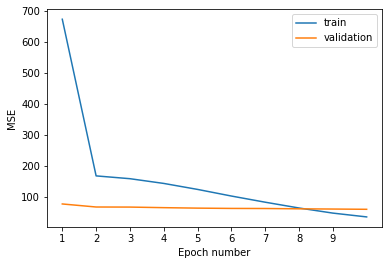

In [95]:
plt.plot(range(1, 11), history_later['loss'], label = "train")
plt.plot(range(1, 11), history_later['val_loss'], label = "validation")

#plt.ylim(plt.ylim()[0], 100)

plt.xticks(range(1, 10))
plt.xlabel("Epoch number")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [96]:
neural_network.layers

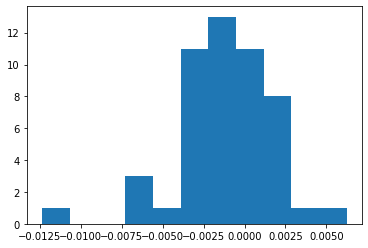

In [97]:
layer_to_examine = neural_network.layers[0]
plt.hist(layer_to_examine.bias.numpy(), bins = "fd")
plt.show()

Our Neural Network overfits the training data. Also it seems that we have a bias and may be we need to get more complex architecture of the model.

In [122]:
neural_network.fit(
    x = test_features,
    y = test_target)

188/188 [==============================] - 0s 2ms/step - loss: 48.8923


On the testing data we get MSE about 49 which is about 7 points expected error. Pretty good, having in mind the scale of results in the examined test is 20 to 100 points.

#### Second Model

We will try to insert an Embedding layer for the categorical variable "country"[[]](https://mmuratarat.github.io/2019-06-12/embeddings-with-numeric-variables-Keras)

The advantage of doing this compared to the traditional approach of creating dummy variables (i.e. doing one hot encodings), is dimentionality reduction and may be lower variance.

In order to combine the categorical data with numerical data, the model should use multiple inputs using Keras functional API. One for each categorical variable and one for the numerical inputs. For the other non-categorical data columns, we simply send them to the model like we would do for any regular network. So once we have the individual models merged into a full model, we can add layers on top of it network and train it.

In [98]:
# multi-hot-encode-input  num_data_input 
#             |                   |
#             |                   |
#             |                   |
#         embedding_layer         |
#             |                   |
#             |                   | 
#              \                 /        
#                \              / 
#               dense_hidden_layer
#                      | 
#               dense_hidden_layer
#                      | 
#                   output_layer 

In [99]:
train_features.shape

TensorShape([49338, 275])

We could see the indeces of the columns with country below. As clean_data contains the target column, that is located before these columns, we should get the indeces-1.

In [100]:
clean_data.columns.get_loc("country_AE"), clean_data.columns.get_loc("country_ZW")

(34, 221)

In [101]:
train_features = train_features.numpy()
val_features = val_features.numpy()
test_features = test_features.numpy()

In [102]:
countries_dummy_train = train_features[:, 33:220]
countries_dummy_val = val_features[:, 33:220]
countries_dummy_test = test_features[:, 33:220]

In [103]:
countries_dummy_train.shape, countries_dummy_val.shape, countries_dummy_test.shape

((49338, 187), (18111, 187), (6007, 187))

In [106]:
train_features_emb = np.concatenate((train_features[:, :32], train_features[:, 221:]), axis =1)
val_features_emb = np.concatenate((val_features[:, :32], val_features[:, 221:]), axis =1)
test_features_emb = np.concatenate((test_features[:, :32], test_features[:, 221:]), axis =1)

In [107]:
train_features_emb.shape, val_features_emb.shape, test_features_emb.shape

((49338, 86), (18111, 86), (6007, 86))

In [109]:
# train_list = [train_features[:, :32], train_features[:, 221:]]
# val_list = [val_features[:, :32], val_features[:, 221:]]
# test_list = [test_features[:, :32], test_features[:, 221:]]

In [110]:
# train_features_emb = tf.concat(train_list, axis=1)
# val_features_emb = tf.concat(val_list, axis=1)
# test_features_emb = tf.concat(test_list, axis=1)

In [ ]:
no_of_unique_cat  = countries_dummy_train.shape[1]

In [114]:
#Jeremy Howard provides the following rule of thumb; embedding size = min(50, number of categories/2).
embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
embedding_size = int(embedding_size)

In [119]:
# Use Input layers, specify input shape (dimensions except first)
inp_cat_data = Input(shape=(no_of_unique_cat,))
inp_num_data = Input(shape=(train_features_emb.shape[1],))
# Bind to embedding layer
emb = Embedding(input_dim=no_of_unique_cat+36, output_dim=embedding_size)(inp_cat_data)  
# Also you need flatten embedded output -
# otherwise it's not possible to concatenate it with inp_num_data
flatten = Flatten()(emb)
# Concatenate two layers
conc = Concatenate()([flatten, inp_num_data])
dense1 = Dense(50, activation="tanh", )(conc)
dropout = Dropout(hyperparams["dropout_rate"])(dense1)
dense2 = Dense(20, activation="tanh", )(dropout)
# Creating output layer
out = Dense(1, activation=None)(dense2)
nn_embedding = Model(inputs=[inp_cat_data, inp_num_data], outputs=out)

nn_embedding.compile(optimizer=Adam(0.01),
              loss="mse",
              metrics=["mse"])

In [117]:
nn_embedding.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 187)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 187, 50)      9350        input_2[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 9350)         0           embedding[0][0]                  
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 86)]         0                                            
______________________________________________________________________________________________

In [120]:
history_emb = nn_embedding.fit(x = [countries_dummy_train, train_features_emb],
                               y = train_target,
                               validation_data = ([countries_dummy_val, val_features_emb], val_target),
                               epochs = 10)

Epoch 1/10
1542/1542 [==============================] - 14s 9ms/step - loss: 545.6128 - mse: 545.6128 - val_loss: 60.8699 - val_mse: 60.8699
Epoch 2/10
1542/1542 [==============================] - 13s 8ms/step - loss: 13.4983 - mse: 13.4983 - val_loss: 60.8441 - val_mse: 60.8441
Epoch 3/10
1542/1542 [==============================] - 13s 8ms/step - loss: 13.6625 - mse: 13.6625 - val_loss: 60.8792 - val_mse: 60.8792
Epoch 4/10
1542/1542 [==============================] - 13s 9ms/step - loss: 13.7119 - mse: 13.7119 - val_loss: 60.8421 - val_mse: 60.8421
Epoch 5/10
1542/1542 [==============================] - 13s 8ms/step - loss: 13.6261 - mse: 13.6261 - val_loss: 60.8357 - val_mse: 60.8357
Epoch 6/10
1542/1542 [==============================] - 12s 8ms/step - loss: 13.4191 - mse: 13.4191 - val_loss: 60.8650 - val_mse: 60.8650
Epoch 7/10
1542/1542 [==============================] - 13s 8ms/step - loss: 13.5776 - mse: 13.5776 - val_loss: 61.2778 - val_mse: 61.2778
Epoch 8/10
1542/1542 [===

In [125]:
nn_embedding.fit(x = [countries_dummy_test, test_features_emb],
                               y = test_target)

188/188 [==============================] - 1s 7ms/step - loss: 33.6845 - mse: 33.6845


The embedding doesn't seem to have the expected major effect, but somehow a little bit better result here - about 6 points expected error.

#### 6. Results

Age of acquisition correlated highly with vocabulary size of acquisition. Young children start to learn concrete words, earlier than abstract words and concepts. Frequency of word use seem to have slight effect on children learnability for separate specific parts of the speech, like "people", "games & routines" and "sound effects".

#### 7. Conclusion

Young children learn concrete words earlier and they understand most of the words in preschool movies. The words in such texts are selected to that children understand them in early age.

#### Acknowledgements
This dataset was collected by Pernille Hansen:

Hansen (2016). What makes a word easy to acquire? The effects of word class, frequency, imageability and phonological neighbourhood density on lexical development. First Language. Advance online publication. doi: 10.1177/0142 723716679956 http://dx.doi.org/10.1177/0142723716679956

#### References

https://en.wikipedia.org/wiki/Machiavellianism_(psychology)

https://books.google.bg/books?hl=bg&lr=&id=d5tGBQAAQBAJ&oi=fnd&pg=PP1&ots=rjiHEMTID1&sig=u7jmoEY_Xj6FwQw5JScZhmBbf_8&redir_esc=y#v=onepage&q&f=false

http://teamvdf.free.fr/TER%20M1/Machiavellianism%20et%20bargain%20game.pdf

https://www.researchgate.net/profile/John_Rauthmann/publication/233787127_Investigating_the_MACH-IV_with_item_response_theory_and_proposing_the_Trimmed_MACH/links/02e7e519a9cd6b0394000000/Investigating-the-MACH-IV-with-item-response-theory-and-proposing-the-Trimmed-MACH.pdf

https://www.researchgate.net/publication/222828329_The_Dark_Triad_of_Personality_Narcissism_Machiavellianism_and_Psychopathy

https://openpsychometrics.org/tests/MACH-IV/demographic-correlations-and-statistics/

https://stackoverflow.com/questions/59567357/lemmatize-tokenised-column-in-pandas

https://www.kaggle.com/rtatman/analyzing-multilingual-data

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

https://stackoverflow.com/questions/59714502/python-translate-a-column-with-multiple-languages-to-english

https://anaconda.org/nbsantos/textblob

https://towardsdatascience.com/to-translate-or-not-to-translate-best-practices-in-non-english-sentiment-analysis-144a53613913

https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#wordnetlemmatizer

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

https://docs.python.org/3/howto/unicode.html

https://anaconda.org/nbsantos/textblob

https://en.wikipedia.org/wiki/Importance_of_religion_by_country

https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

https://ramiro.org/notebook/basemap-choropleth/

https://plotly.com/python/colorscales/

https://stackoverflow.com/questions/4674623/why-do-we-have-to-normalize-the-input-for-an-artificial-neural-network

https://stats.stackexchange.com/questions/291680/can-any-one-explain-why-dot-product-is-used-in-neural-network-and-what-is-the-in

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

https://www.researchgate.net/profile/Kedar_Potdar/publication/320465713_A_Comparative_Study_of_Categorical_Variable_Encoding_Techniques_for_Neural_Network_Classifiers/links/59e6f9554585151e5465859c/A-Comparative-Study-of-Categorical-Variable-Encoding-Techniques-for-Neural-Network-Classifiers.pdf

https://towardsdatascience.com/an-overview-of-categorical-input-handling-for-neural-networks-c172ba552dee

http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/

http://jalammar.github.io/feedforward-neural-networks-visual-interactive/

https://cs231n.github.io/neural-networks-1/

https://datascience.stackexchange.com/questions/29719/how-to-set-batch-size-steps-per-epoch-and-validation-steps

https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

https://mmuratarat.github.io/2019-06-12/embeddings-with-numeric-variables-Keras

https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0